In [1063]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [1064]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
pd.set_option('display.max_column',None)
from sklearn.linear_model import LinearRegression

In [1065]:
df=pd.read_csv('C:\\Users\\telug\\OneDrive\\Desktop\\DS\\Data\\HousePrices.csv')
pd.set_option('display.max_columns()',None)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [1066]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1067]:
features_with_na=[i for i in df.columns if df[i].isnull().sum()>1]

In [1068]:
for i in features_with_na:
    print(i, np.round(df[i].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.0055  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


In [1069]:
#Dropping columns with more than 80% of missing values
df.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [1070]:
numerical_features = [i for i in df.columns if df[i].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  37


In [1071]:
year_feature = [i for i in numerical_features if 'Yr' in i or 'Year' in i]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [1072]:
num_categorical_feature=[i for i in numerical_features if len(df[i].unique())<25 and i not in year_feature+['Id']]
print("num_categorical_feature Count: {}".format(len(num_categorical_feature)))
num_categorical_feature

num_categorical_feature Count: 17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [1073]:
num_continuous_feature=[i for i in numerical_features if i not in num_categorical_feature+year_feature+['Id']]
print("num_continuous_feature Count {}".format(len(num_continuous_feature)))
num_continuous_feature

num_continuous_feature Count 16


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [1074]:
categorical_features=[i for i in df.columns if df[i].dtypes=='O']
print("categorical_features {}".format(len(categorical_features)))
categorical_features

categorical_features 39


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [1075]:
values = {
    "Electrical":"SBrkr",
    "Street":"Pave",
    "MSZoning":"RL",
    "FireplaceQu": "Gd",
    "GarageCond": "TA",
    "GarageType": "Attchd",                #filled with mode values
    "GarageFinish": "Unf",
    "GarageQual": "TA",
    "BsmtExposure": "No",
    "BsmtFinType2": "Unf",
    "BsmtFinType1": "Unf",
    "BsmtCond": "TA",
    "BsmtQual": "TA",
    "MasVnrType": "None",
}

df.fillna(value=values, inplace=True)

In [1076]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [1077]:
 #filled with median values(continous data,skwed)

df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True) 

In [1078]:
#filled with median values(continous data,skwed)

df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)  

In [1079]:
#removed missing values 'GarageYrBlt' becoz it contained only #5% of missing values

df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)  

In [1080]:
#after filling missing values and removing certian missing values we are left with 1379 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1379 non-null   int64  
 1   MSZoning       1379 non-null   object 
 2   LotFrontage    1379 non-null   float64
 3   LotArea        1379 non-null   int64  
 4   Street         1379 non-null   object 
 5   LotShape       1379 non-null   object 
 6   LandContour    1379 non-null   object 
 7   Utilities      1379 non-null   object 
 8   LotConfig      1379 non-null   object 
 9   LandSlope      1379 non-null   object 
 10  Neighborhood   1379 non-null   object 
 11  Condition1     1379 non-null   object 
 12  Condition2     1379 non-null   object 
 13  BldgType       1379 non-null   object 
 14  HouseStyle     1379 non-null   object 
 15  OverallQual    1379 non-null   int64  
 16  OverallCond    1379 non-null   int64  
 17  YearBuilt      1379 non-null   int64  
 18  YearRemo

NUMERICAL CONTINOUS DATA

In [1081]:
num_continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

#checking for Outliers and capping them

LotFrontage

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

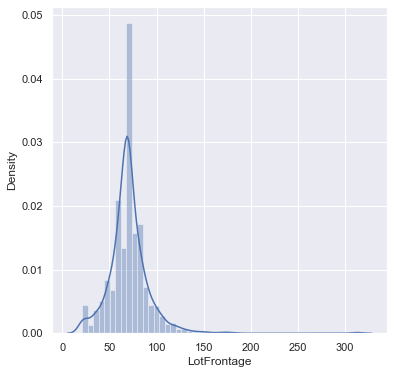

In [1082]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['LotFrontage'])
plt.show

<AxesSubplot:>

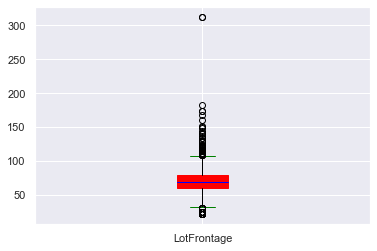

In [1083]:
LotFrontage=df['LotFrontage']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
LotFrontage.plot.box(color=props2,patch_artist=True,vert=True)

In [1084]:
def find_boundaries(df,feature):
    Q1=df[feature].quantile(.25)
    Q3=df[feature].quantile(.75)
    IQR=Q3-Q1
    lower_boundary=Q1-1.5*IQR
    upper_boundary=Q3+1.5*IQR
    
    return lower_boundary,upper_boundary

In [1085]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [1086]:
outliers = find_outliers_IQR(df['LotFrontage'])
print('number of outliers: '+ str(len(outliers)))
(len(outliers))/(len('LotFrontage'))

number of outliers: 98


8.909090909090908

In [1087]:
lower_LotFrontage,upper_LotFrontage=find_boundaries(df,'LotFrontage')
print(lower_LotFrontage,upper_LotFrontage)

31.5 107.5


In [1088]:
df['LotFrontage']=np.where(df['LotFrontage']>upper_LotFrontage,upper_LotFrontage,
                         np.where(df['LotFrontage']<lower_LotFrontage,lower_LotFrontage,df['LotFrontage']))


C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

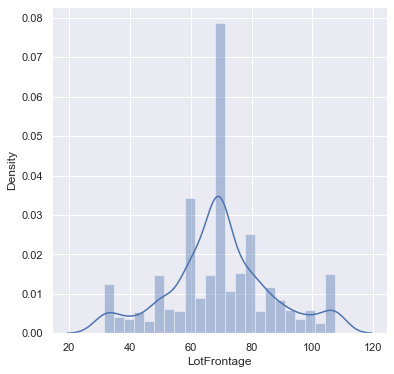

In [1089]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['LotFrontage'])
plt.show

<AxesSubplot:>

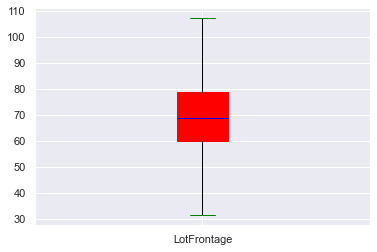

In [1090]:
LotFrontage=df['LotFrontage']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
LotFrontage.plot.box(color=props2,patch_artist=True,vert=True)

LotArea

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

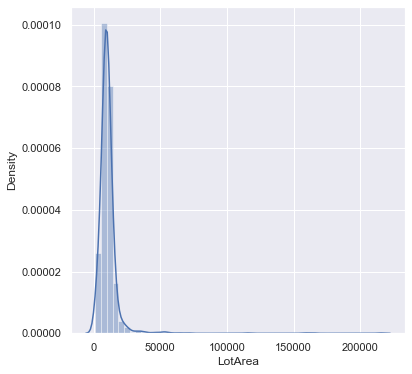

In [1091]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['LotArea'])
plt.show

<AxesSubplot:>

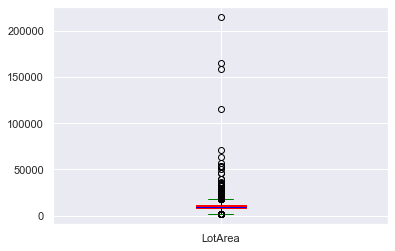

In [1092]:
LotArea=df['LotArea']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
LotArea.plot.box(color=props2,patch_artist=True,vert=True)

In [1093]:
outliers = find_outliers_IQR(df['LotArea'])
print('number of outliers: '+ str(len(outliers)))
(len(outliers))/(len('LotArea'))

number of outliers: 80


11.428571428571429

In [1094]:
lower_LotArea,upper_LotArea=find_boundaries(df,'LotArea')
print(lower_LotArea,upper_LotArea)

1789.75 17659.75


In [1095]:
df['LotArea']=np.where(df['LotArea']>upper_LotArea,upper_LotArea,
                         np.where(df['LotArea']<lower_LotArea,lower_LotArea,df['LotArea']))

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

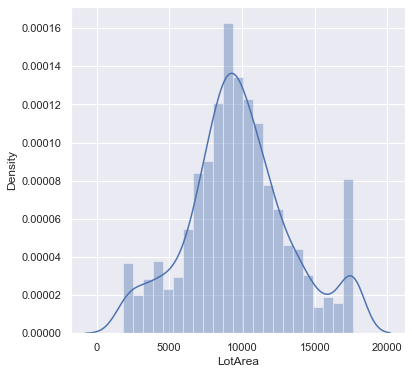

In [1096]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['LotArea'])
plt.show

<AxesSubplot:>

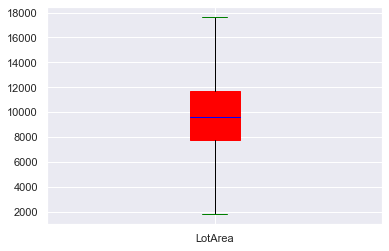

In [1097]:
LotArea=df['LotArea']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
LotArea.plot.box(color=props2,patch_artist=True,vert=True)

BsmtFinSF1

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

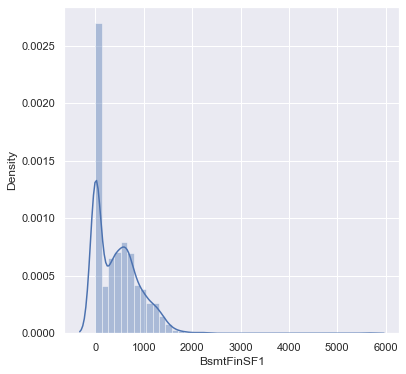

In [1098]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['BsmtFinSF1'])
plt.show

<AxesSubplot:>

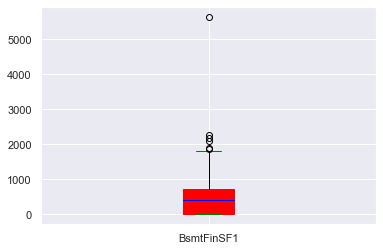

In [1099]:
BsmtFinSF1=df['BsmtFinSF1']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
BsmtFinSF1.plot.box(color=props2,patch_artist=True,vert=True)

In [1100]:
outliers = find_outliers_IQR(df['BsmtFinSF1'])
print('number of outliers: '+ str(len(outliers)))
(len(outliers))/(len('BsmtFinSF1'))

number of outliers: 6


0.6

In [1101]:
lower_BsmtFinSF1,upper_BsmtFinSF1=find_boundaries(df,'BsmtFinSF1')
print(lower_BsmtFinSF1,upper_BsmtFinSF1)

-1098.0 1830.0


In [1102]:
df['BsmtFinSF1']=np.where(df['BsmtFinSF1']>upper_BsmtFinSF1,upper_BsmtFinSF1,
                         np.where(df['BsmtFinSF1']<lower_BsmtFinSF1,lower_BsmtFinSF1,df['BsmtFinSF1']))

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

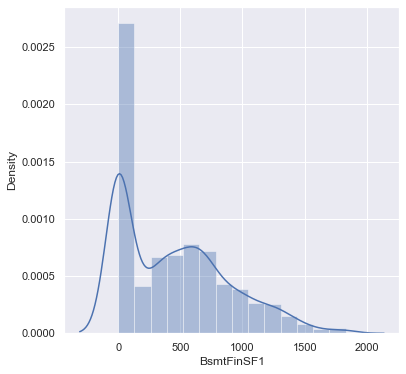

In [1103]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['BsmtFinSF1'])
plt.show

<AxesSubplot:>

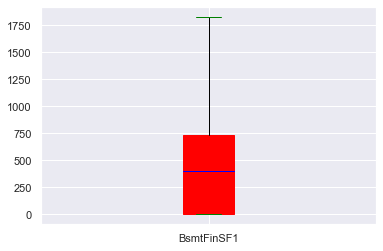

In [1104]:
BsmtFinSF1=df['BsmtFinSF1']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
BsmtFinSF1.plot.box(color=props2,patch_artist=True,vert=True)

'BsmtFinSF2'

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

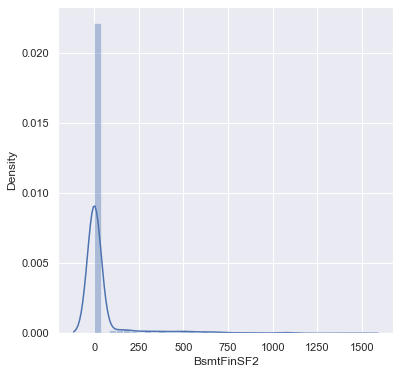

In [1105]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['BsmtFinSF2'])
plt.show

<AxesSubplot:>

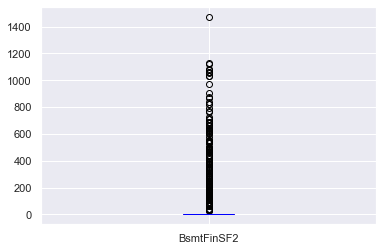

In [1106]:
BsmtFinSF2=df['BsmtFinSF2']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
BsmtFinSF2.plot.box(color=props2,patch_artist=True,vert=True)

In [1107]:
df['BsmtFinSF2'].value_counts()

0       1216
180        5
374        3
468        2
294        2
        ... 
344        1
531        1
121        1
258        1
1029       1
Name: BsmtFinSF2, Length: 142, dtype: int64

In [1108]:
outliers = find_outliers_IQR(df['BsmtFinSF2'])
print('number of outliers: '+ str(len(outliers)))
(len(outliers))/(len('BsmtFinSF2'))

number of outliers: 163


16.3

In [1109]:
lower_BsmtFinSF2,upper_BsmtFinSF2=find_boundaries(df,'BsmtFinSF2')
print(lower_BsmtFinSF2,upper_BsmtFinSF2)

0.0 0.0


In [1110]:
df['BsmtFinSF2']=np.where(df['BsmtFinSF2']>upper_BsmtFinSF2,upper_BsmtFinSF2,
                         np.where(df['BsmtFinSF2']<lower_BsmtFinSF2,lower_BsmtFinSF2,df['BsmtFinSF2']))

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

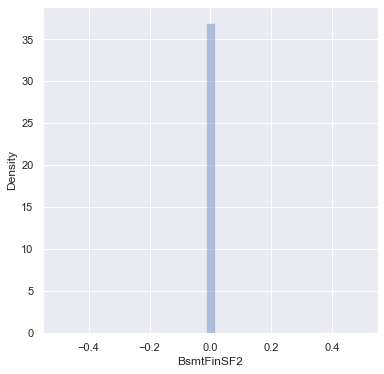

In [1111]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['BsmtFinSF2'])
plt.show

<AxesSubplot:>

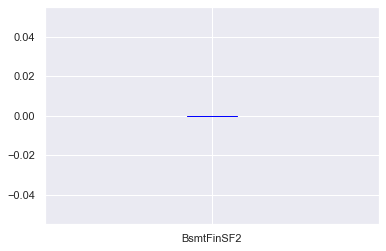

In [1112]:
BsmtFinSF2=df['BsmtFinSF2']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
BsmtFinSF2.plot.box(color=props2,patch_artist=True,vert=True)

'BsmtUnfSF'

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

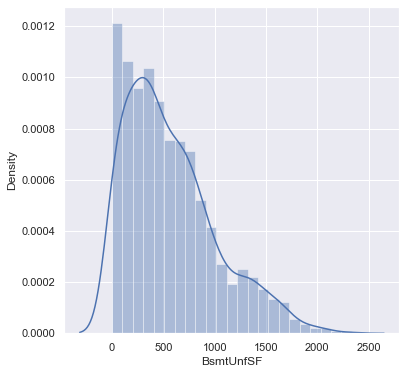

In [1113]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['BsmtUnfSF'])
plt.show

<AxesSubplot:>

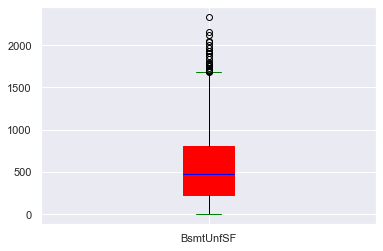

In [1114]:
BsmtUnfSF=df['BsmtUnfSF']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
BsmtUnfSF.plot.box(color=props2,patch_artist=True,vert=True)

In [1115]:
outliers = find_outliers_IQR(df['BsmtUnfSF'])
print('number of outliers: '+ str(len(outliers)))
(len(outliers))/(len('BsmtUnfSF'))

number of outliers: 27


3.0

In [1116]:
lower_BsmtUnfSF,upper_BsmtUnfSF=find_boundaries(df,'BsmtUnfSF')
print(lower_BsmtUnfSF,upper_BsmtUnfSF)

-646.5 1685.5


In [1117]:
df['BsmtUnfSF']=np.where(df['BsmtUnfSF']>upper_BsmtUnfSF,upper_BsmtUnfSF,
                         np.where(df['BsmtUnfSF']<lower_BsmtUnfSF,lower_BsmtUnfSF,df['BsmtUnfSF']))

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

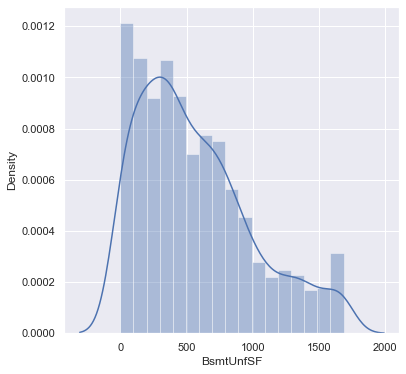

In [1118]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['BsmtUnfSF'])
plt.show

<AxesSubplot:>

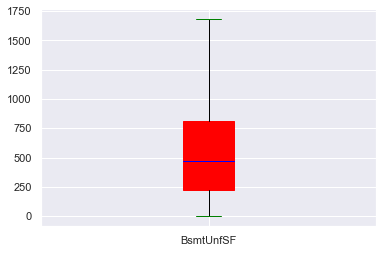

In [1119]:
BsmtUnfSF=df['BsmtUnfSF']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
BsmtUnfSF.plot.box(color=props2,patch_artist=True,vert=True)

MasVnrArea

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

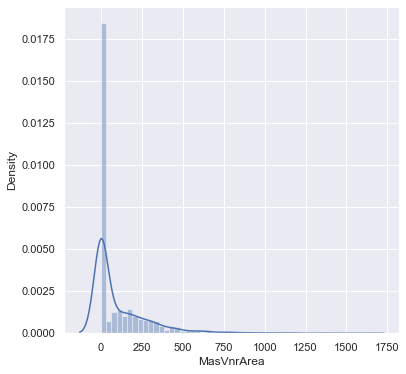

In [1120]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['MasVnrArea'])
plt.show

<AxesSubplot:>

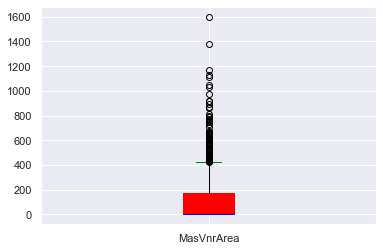

In [1121]:
MasVnrArea=df['MasVnrArea']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
MasVnrArea.plot.box(color=props2,patch_artist=True,vert=True)

In [1122]:
outliers = find_outliers_IQR(df['MasVnrArea'])
print('number of outliers: '+ str(len(outliers)))
(len(outliers))/(len('MasVnrArea'))

number of outliers: 86


8.6

In [1123]:
lower_MasVnrArea,upper_MasVnrArea=find_boundaries(df,'MasVnrArea')
print(lower_MasVnrArea,upper_MasVnrArea)

-255.75 426.25


In [1124]:
df['MasVnrArea']=np.where(df['MasVnrArea']>upper_MasVnrArea,upper_MasVnrArea,
                         np.where(df['MasVnrArea']<lower_MasVnrArea,lower_MasVnrArea,df['MasVnrArea']))

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

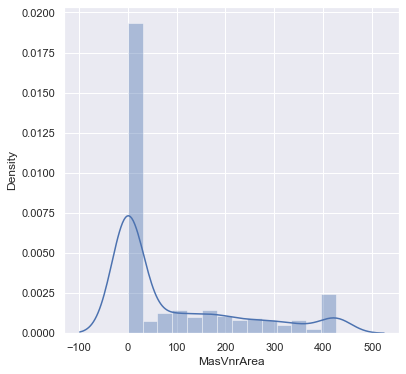

In [1125]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['MasVnrArea'])
plt.show

<AxesSubplot:>

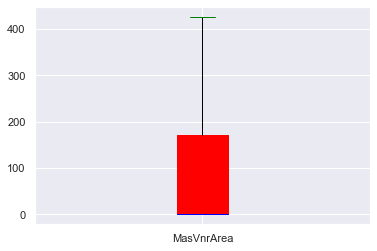

In [1126]:
MasVnrArea=df['MasVnrArea']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
MasVnrArea.plot.box(color=props2,patch_artist=True,vert=True)

TotalBsmtSF

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

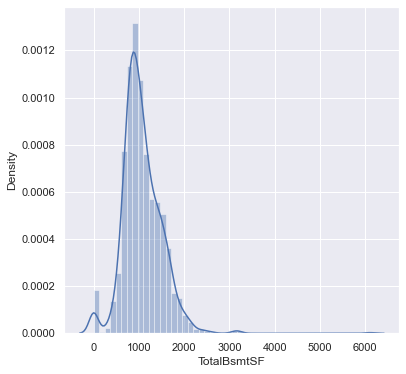

In [1127]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['TotalBsmtSF'])
plt.show

<AxesSubplot:>

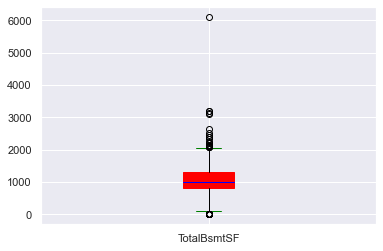

In [1128]:
TotalBsmtSF=df['TotalBsmtSF']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
TotalBsmtSF.plot.box(color=props2,patch_artist=True,vert=True)

In [1129]:
outliers = find_outliers_IQR(df['TotalBsmtSF'])
print('number of outliers: '+ str(len(outliers)))
(len(outliers))/(len('TotalBsmtSF'))

number of outliers: 54


4.909090909090909

In [1130]:
lower_TotalBsmtSF,upper_TotalBsmtSF=find_boundaries(df,'TotalBsmtSF')
print(lower_TotalBsmtSF,upper_TotalBsmtSF)

54.0 2070.0


In [1131]:
df['TotalBsmtSF']=np.where(df['TotalBsmtSF']>upper_TotalBsmtSF,upper_TotalBsmtSF,
                         np.where(df['TotalBsmtSF']<lower_TotalBsmtSF,lower_TotalBsmtSF,df['TotalBsmtSF']))

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

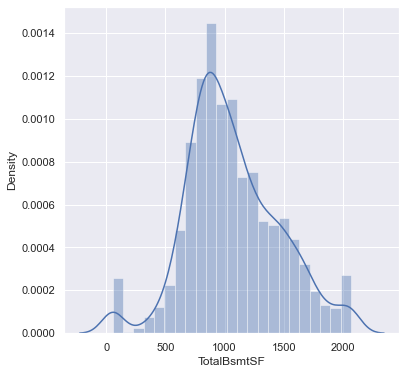

In [1132]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['TotalBsmtSF'])
plt.show

<AxesSubplot:>

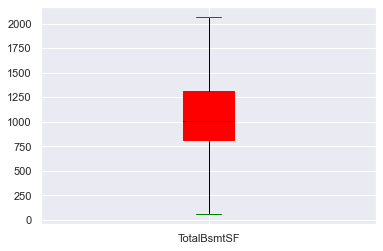

In [1133]:
TotalBsmtSF=df['TotalBsmtSF']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
TotalBsmtSF.plot.box(color=props2,patch_artist=True,vert=True)

1stFlrSF

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

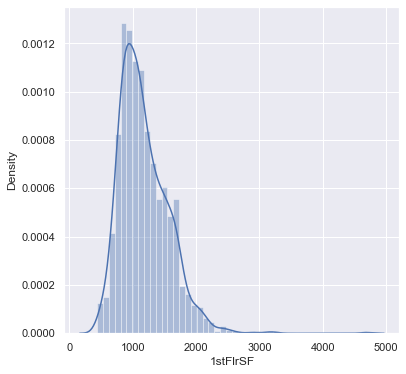

In [1134]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['1stFlrSF'])
plt.show

<AxesSubplot:>

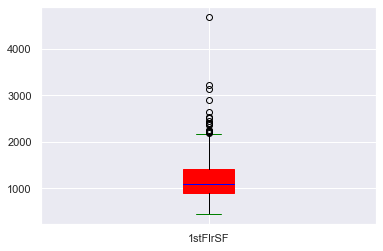

In [1135]:
df['1stFlrSF']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
df['1stFlrSF'].plot.box(color=props2,patch_artist=True,vert=True)

In [1136]:
outliers = find_outliers_IQR(df['1stFlrSF'])
print('number of outliers: '+ str(len(outliers)))
(len(outliers))/(len('1stFlrSF'))

number of outliers: 18


2.25

In [1137]:
lower_1stFlrSF,upper_1stFlrSF=find_boundaries(df,'1stFlrSF')
print(lower_1stFlrSF,upper_1stFlrSF)

114.0 2194.0


In [1138]:
df['1stFlrSF']=np.where(df['1stFlrSF']>upper_1stFlrSF,upper_1stFlrSF,
                         np.where(df['1stFlrSF']<lower_1stFlrSF,lower_1stFlrSF,df['1stFlrSF']))

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

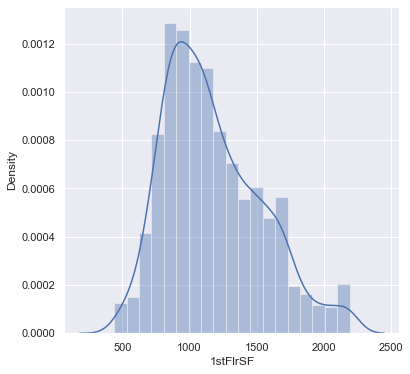

In [1139]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['1stFlrSF'])
plt.show

<AxesSubplot:>

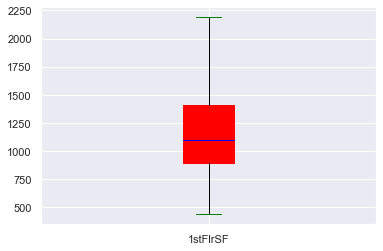

In [1140]:
df['1stFlrSF']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
df['1stFlrSF'].plot.box(color=props2,patch_artist=True,vert=True)

2ndFlrSF

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

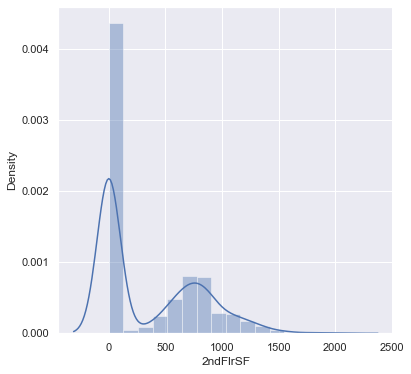

In [1141]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['2ndFlrSF'])
plt.show

<AxesSubplot:>

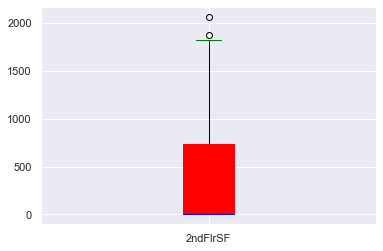

In [1142]:
df['2ndFlrSF']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
df['2ndFlrSF'].plot.box(color=props2,patch_artist=True,vert=True)

In [1143]:
outliers = find_outliers_IQR(df['2ndFlrSF'])
print('number of outliers: '+ str(len(outliers)))
(len(outliers))/(len('2ndFlrSF'))

number of outliers: 2


0.25

In [1144]:
lower_2ndFlrSF,upper_2ndFlrSF=find_boundaries(df,'2ndFlrSF')
print(lower_2ndFlrSF,upper_2ndFlrSF)

-1107.75 1846.25


In [1145]:
df['2ndFlrSF']=np.where(df['2ndFlrSF']>upper_2ndFlrSF,upper_2ndFlrSF,
                         np.where(df['2ndFlrSF']<lower_2ndFlrSF,lower_2ndFlrSF,df['2ndFlrSF']))

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

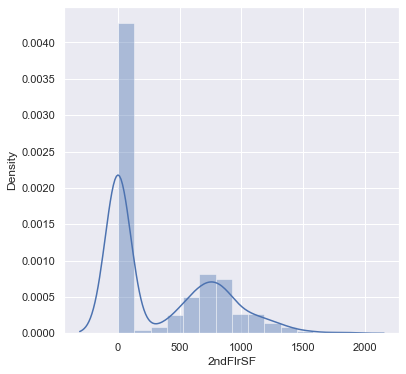

In [1146]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['2ndFlrSF'])
plt.show

<AxesSubplot:>

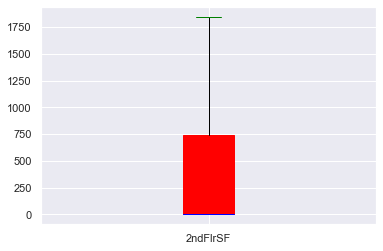

In [1147]:
df['2ndFlrSF']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
df['2ndFlrSF'].plot.box(color=props2,patch_artist=True,vert=True)

GrLivArea

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

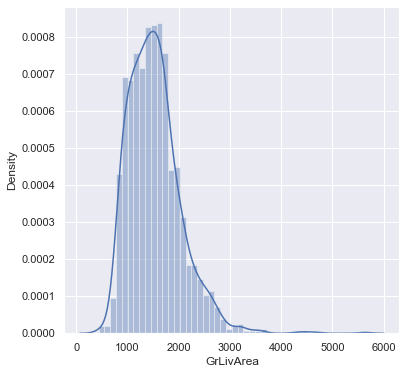

In [1148]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['GrLivArea'])
plt.show

<AxesSubplot:>

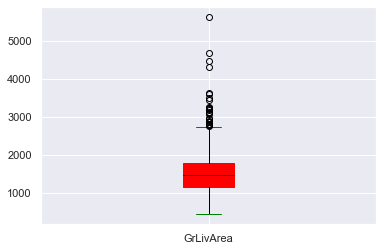

In [1149]:
GrLivArea=df['GrLivArea']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
GrLivArea.plot.box(color=props2,patch_artist=True,vert=True)

In [1150]:
outliers = find_outliers_IQR(df['GrLivArea'])
print('number of outliers: '+ str(len(outliers)))
(len(outliers))/(len('GrLivArea'))

number of outliers: 29


3.2222222222222223

In [1151]:
lower_GrLivArea,upper_GrLivArea=find_boundaries(df,'GrLivArea')
print(lower_GrLivArea,upper_GrLivArea)

200.0 2744.0


In [1152]:
df['GrLivArea']=np.where(df['GrLivArea']>upper_GrLivArea,upper_GrLivArea,
                         np.where(df['GrLivArea']<lower_GrLivArea,lower_GrLivArea,df['GrLivArea']))

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

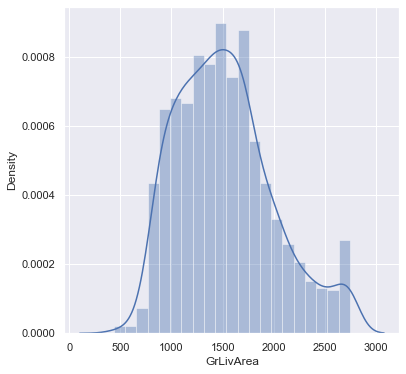

In [1153]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['GrLivArea'])
plt.show

<AxesSubplot:>

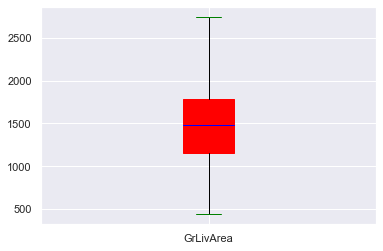

In [1154]:
GrLivArea=df['GrLivArea']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
GrLivArea.plot.box(color=props2,patch_artist=True,vert=True)

GarageArea

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

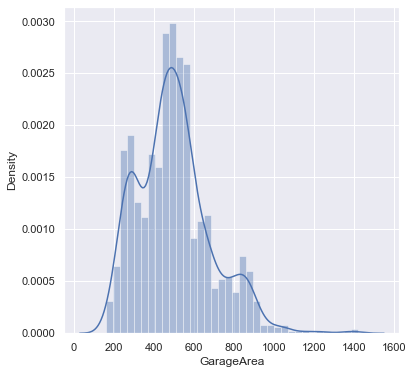

In [1155]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['GarageArea'])
plt.show

<AxesSubplot:>

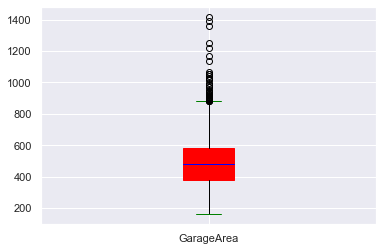

In [1156]:
GarageArea=df['GarageArea']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
GarageArea.plot.box(color=props2,patch_artist=True,vert=True)

In [1157]:
outliers = find_outliers_IQR(df['GarageArea'])
print('number of outliers: '+ str(len(outliers)))
(len(outliers))/(len('GarageArea'))

number of outliers: 46


4.6

In [1158]:
lower_GarageArea,upper_GarageArea=find_boundaries(df,'GarageArea')
print(lower_GarageArea,upper_GarageArea)

80.0 880.0


In [1159]:
df['GarageArea']=np.where(df['GarageArea']>upper_GarageArea,upper_GarageArea,
                         np.where(df['GarageArea']<lower_GarageArea,lower_GarageArea,df['GarageArea']))

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

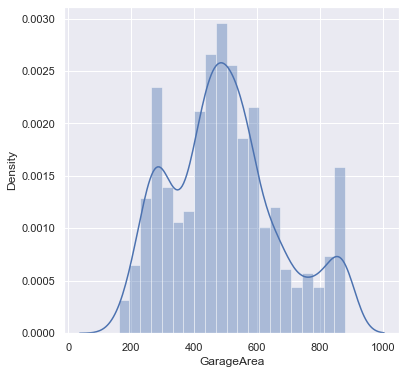

In [1160]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['GarageArea'])
plt.show

<AxesSubplot:>

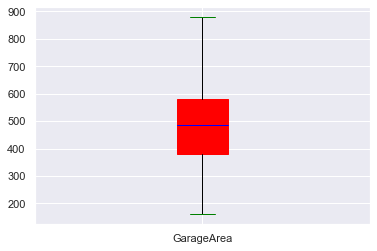

In [1161]:
GarageArea=df['GarageArea']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
GarageArea.plot.box(color=props2,patch_artist=True,vert=True)

WoodDeckSF

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

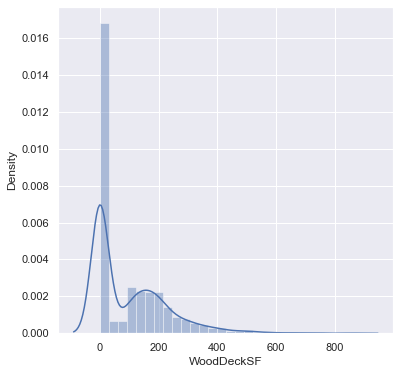

In [1162]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['WoodDeckSF'])
plt.show

<AxesSubplot:>

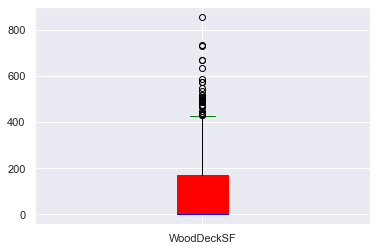

In [1163]:
WoodDeckSF=df['WoodDeckSF']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
WoodDeckSF.plot.box(color=props2,patch_artist=True,vert=True)

In [1164]:
outliers = find_outliers_IQR(df['WoodDeckSF'])
print('number of outliers: '+ str(len(outliers)))
(len(outliers))/(len('WoodDeckSF'))

number of outliers: 30


3.0

In [1165]:
lower_WoodDeckSF,upper_WoodDeckSF=find_boundaries(df,'WoodDeckSF')
print(lower_WoodDeckSF,upper_WoodDeckSF)

-256.5 427.5


In [1166]:
df['WoodDeckSF']=np.where(df['WoodDeckSF']>upper_WoodDeckSF,upper_WoodDeckSF,
                         np.where(df['GarageArea']<lower_WoodDeckSF,lower_WoodDeckSF,df['WoodDeckSF']))

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

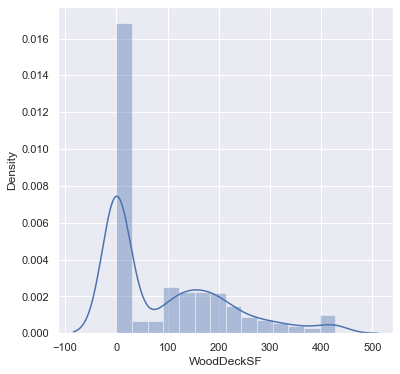

In [1167]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['WoodDeckSF'])
plt.show

<AxesSubplot:>

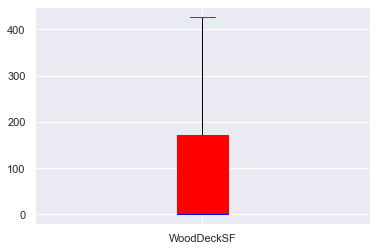

In [1168]:
WoodDeckSF=df['WoodDeckSF']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
WoodDeckSF.plot.box(color=props2,patch_artist=True,vert=True)

OpenPorchSF

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

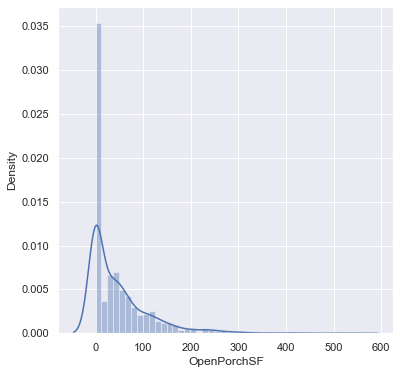

In [1169]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['OpenPorchSF'])
plt.show

<AxesSubplot:>

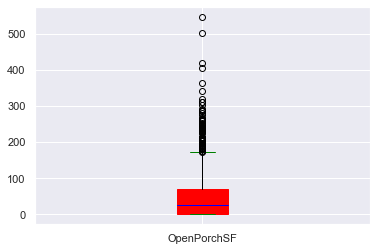

In [1170]:
OpenPorchSF=df['OpenPorchSF']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
OpenPorchSF.plot.box(color=props2,patch_artist=True,vert=True)

In [1171]:
outliers = find_outliers_IQR(df['OpenPorchSF'])
print('number of outliers: '+ str(len(outliers)))
(len(outliers))/(len('OpenPorchSF'))

number of outliers: 69


6.2727272727272725

In [1172]:
lower_OpenPorchSF,upper_OpenPorchSF=find_boundaries(df,'OpenPorchSF')
print(lower_OpenPorchSF,upper_OpenPorchSF)

-104.25 173.75


In [1173]:
df['OpenPorchSF']=np.where(df['OpenPorchSF']>upper_OpenPorchSF,upper_OpenPorchSF,
                         np.where(df['OpenPorchSF']<lower_OpenPorchSF,lower_OpenPorchSF,df['OpenPorchSF']))

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

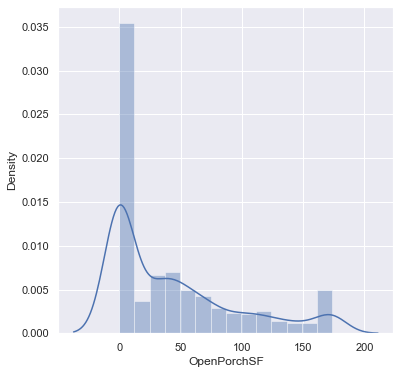

In [1174]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['OpenPorchSF'])
plt.show

<AxesSubplot:>

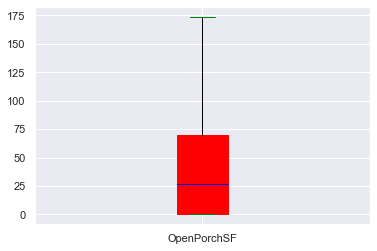

In [1175]:
OpenPorchSF=df['OpenPorchSF']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
OpenPorchSF.plot.box(color=props2,patch_artist=True,vert=True)

'EnclosedPorch'

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

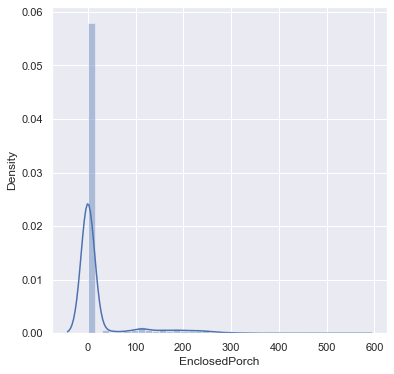

In [1176]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['EnclosedPorch'])
plt.show

<AxesSubplot:>

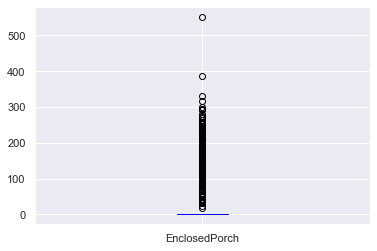

In [1177]:
EnclosedPorch=df['EnclosedPorch']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
EnclosedPorch.plot.box(color=props2,patch_artist=True,vert=True)

In [1178]:
df['EnclosedPorch'].value_counts()

0      1193
112      15
216       5
120       5
96        5
       ... 
54        1
64        1
136       1
200       1
99        1
Name: EnclosedPorch, Length: 111, dtype: int64

In [1179]:
outliers = find_outliers_IQR(df['EnclosedPorch'])
print('number of outliers: '+ str(len(outliers)))
(len(outliers))/(len('EnclosedPorch'))

number of outliers: 186


14.307692307692308

In [1180]:
lower_EnclosedPorch,upper_EnclosedPorch=find_boundaries(df,'EnclosedPorch')
print(lower_EnclosedPorch,upper_EnclosedPorch)

0.0 0.0


In [1181]:
df['EnclosedPorch']=np.where(df['EnclosedPorch']>upper_EnclosedPorch,upper_EnclosedPorch,
                         np.where(df['EnclosedPorch']<lower_EnclosedPorch,lower_EnclosedPorch,df['EnclosedPorch']))

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

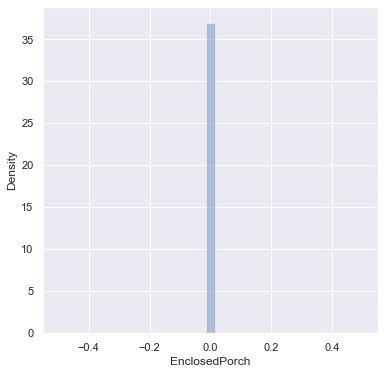

In [1182]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['EnclosedPorch'])
plt.show

<AxesSubplot:>

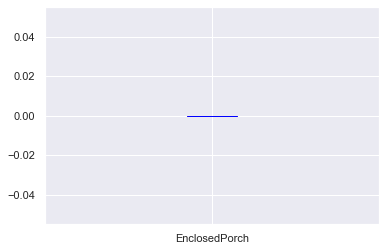

In [1183]:
EnclosedPorch=df['EnclosedPorch']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
EnclosedPorch.plot.box(color=props2,patch_artist=True,vert=True)

'ScreenPorch'

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

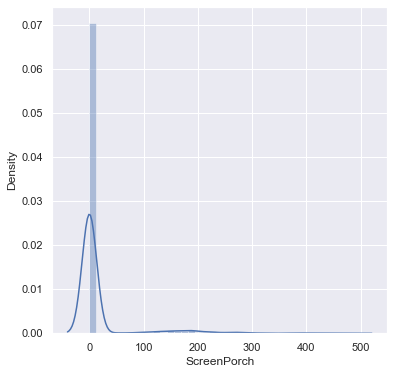

In [1184]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['ScreenPorch'])
plt.show

<AxesSubplot:>

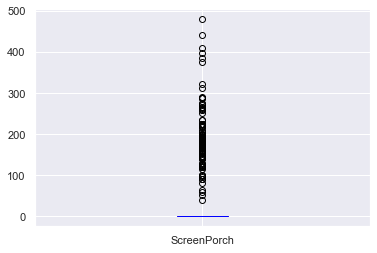

In [1185]:
ScreenPorch=df['ScreenPorch']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
ScreenPorch.plot.box(color=props2,patch_artist=True,vert=True)

In [1186]:
df['ScreenPorch'].value_counts()

0      1263
192       6
120       5
224       5
189       4
       ... 
291       1
260       1
385       1
156       1
40        1
Name: ScreenPorch, Length: 76, dtype: int64

In [1187]:
outliers = find_outliers_IQR(df['ScreenPorch'])
print('number of outliers: '+ str(len(outliers)))
(len(outliers))/(len('ScreenPorch'))

number of outliers: 116


10.545454545454545

In [1188]:
lower_ScreenPorch,upper_ScreenPorch=find_boundaries(df,'ScreenPorch')
print(lower_ScreenPorch,upper_ScreenPorch)

0.0 0.0


In [1189]:
df['ScreenPorch']=np.where(df['ScreenPorch']>upper_ScreenPorch,upper_ScreenPorch,
                         np.where(df['ScreenPorch']<lower_ScreenPorch,lower_ScreenPorch,df['ScreenPorch']))

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

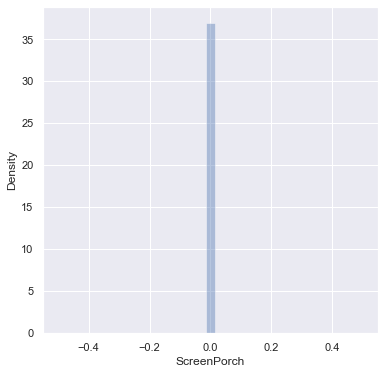

In [1190]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['ScreenPorch'])
plt.show

<AxesSubplot:>

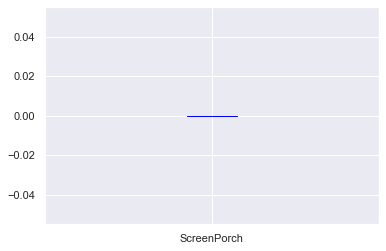

In [1191]:
ScreenPorch=df['ScreenPorch']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
ScreenPorch.plot.box(color=props2,patch_artist=True,vert=True)

SalePrice

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

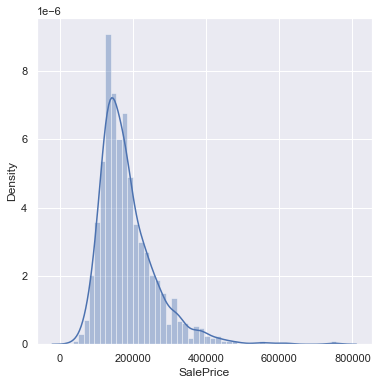

In [1192]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['SalePrice'])
plt.show

<AxesSubplot:>

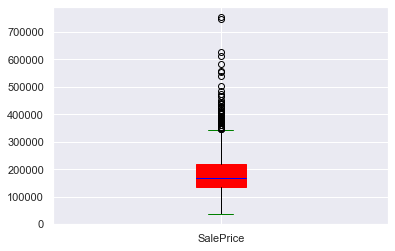

In [1193]:
SalePrice=df['SalePrice']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
SalePrice.plot.box(color=props2,patch_artist=True,vert=True)

In [1194]:
outliers = find_outliers_IQR(df['SalePrice'])
print('number of outliers: '+ str(len(outliers)))
(len(outliers))/(len('SalePrice'))

number of outliers: 59


6.555555555555555

In [1195]:
lower_SalePrice,upper_SalePrice=find_boundaries(df,'SalePrice')
print(lower_SalePrice,upper_SalePrice)

8375.0 343375.0


In [1196]:
df['SalePrice']=np.where(df['SalePrice']>upper_SalePrice,upper_SalePrice,
                         np.where(df['SalePrice']<lower_SalePrice,lower_SalePrice,df['SalePrice']))

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

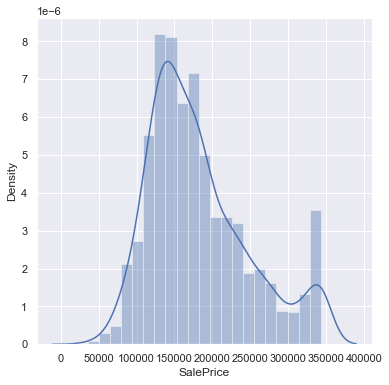

In [1197]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['SalePrice'])
plt.show

<AxesSubplot:>

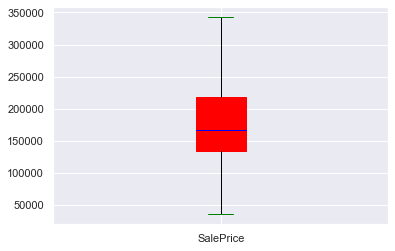

In [1198]:
SalePrice=df['SalePrice']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
SalePrice.plot.box(color=props2,patch_artist=True,vert=True)

In [1199]:
#transforming dependent variable(SalePrice) to make it near normal distribution
#df['SalePrice']=df['SalePrice'].transform(np.sqrt)

In [1200]:
#sns.set()
#plt.figure(figsize=(6,6))
#sns.distplot(df['SalePrice'])
#plt.show

<AxesSubplot:>

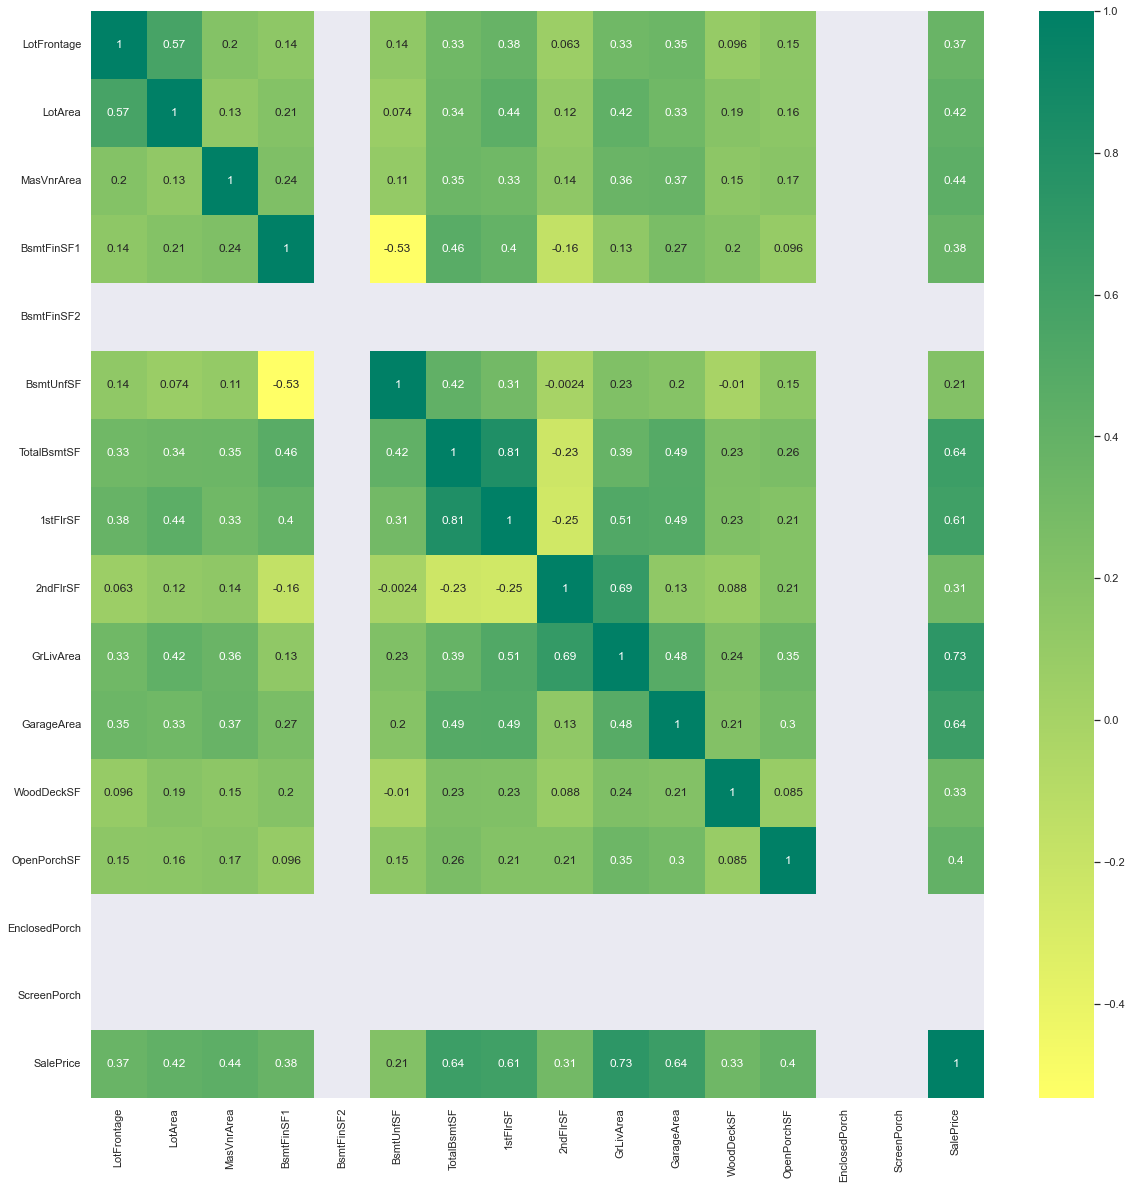

In [1201]:
corr = df[num_continuous_feature].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap = 'summer_r')


In [1202]:
#Dropping columns whose r values are between -0.25 to +0.25 with respect to SalePrice
df.drop(['BsmtFinSF2','EnclosedPorch','ScreenPorch','BsmtUnfSF'],axis=1,inplace=True)

PERFORMING ANNOVA and TUKEYS ON NUMERICAL CATEGORICAL FEATURES

#we remove column with p>0.05

In [1203]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [1204]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [1205]:
num_categorical_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

'MSSubClass'

In [1206]:
annova=ols('SalePrice ~ MSSubClass',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df        F   PR(>F)
MSSubClass  3.735784e+10     1.0  8.48791  0.00363
Residual    6.060592e+12  1377.0      NaN      NaN


In [1207]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.MSSubClass,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
    20     30  -81386.0037    0.0 -110041.6358 -52730.3715   True
    20     40  -27593.3762 0.9998 -125620.6044   70433.852  False
    20     45  -72229.4873 0.0159 -137891.4329  -6567.5417   True
    20     50  -36729.2312    0.0  -55818.3208 -17640.1415   True
    20     60   47015.0987    0.0   32845.1461  61185.0514   True
    20     70  -15093.4639  0.862  -42340.7692  12153.8414  False
    20     75   10236.9809    1.0  -42657.4489  63131.4108  False
    20     80  -14009.8417 0.9132  -41044.5913  13024.9079  False
    20     85  -35908.3762 0.2809  -80410.4963   8593.7439  False
    20     90  -49449.9762    0.0  -81494.1074  -17405.845   True
    20    120   16221.1181 0.4878   -6398.7064  38840.9425  False
    20    160  -43615.3434    0.0  -70045.1291 -17185.5577   True
    20    

In [1208]:
#Replacing similar columns(reject=false)
df['MSSubClass'].replace({40:20},inplace=True)
df['MSSubClass'].replace({70:20},inplace=True)
df['MSSubClass'].replace({75:20},inplace=True)
df['MSSubClass'].replace({80:20},inplace=True)
df['MSSubClass'].replace({85:20},inplace=True)

df['MSSubClass'].replace({120:20},inplace=True)

df['MSSubClass'].replace({45:30},inplace=True)
df['MSSubClass'].replace({90:30},inplace=True)
df['MSSubClass'].replace({180:30},inplace=True)
df['MSSubClass'].replace({190:30},inplace=True)

df['MSSubClass'].replace({160:30},inplace=True)

In [1209]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.MSSubClass,alpha=0.05)
print (tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
    20     30  -56792.613  -0.0 -68950.0258 -44635.2003   True
    20     50  -35484.968   0.0 -49604.9375 -21364.9984   True
    20     60  48259.3619  -0.0  38071.0011  58447.7228   True
    30     50   21307.645 0.007   4318.9478  38296.3423   True
    30     60 105051.9749  -0.0  91157.9117 118946.0381   True
    50     60  83744.3299  -0.0  68104.1302  99384.5296   True
--------------------------------------------------------------


In [1210]:
annova=ols('SalePrice ~ MSSubClass',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df         F  PR(>F)
MSSubClass  3.038164e+11     1.0  72.20324     0.0
Residual    5.794133e+12  1377.0       NaN     NaN


'OverallQual'

In [1211]:
annova=ols('SalePrice ~ OverallQual',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                   sum_sq      df           F  PR(>F)
OverallQual  4.032884e+12     1.0  2689.15458     0.0
Residual     2.065066e+12  1377.0         NaN     NaN


In [1212]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.OverallQual,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     2      3  48921.2857 0.7125 -37727.0475  135569.619  False
     2      4  64687.7889 0.2566 -17259.9356 146635.5134  False
     2      5  87399.4836 0.0241   6125.6323 168673.3348   True
     2      6 115524.4309 0.0004  34248.7445 196800.1174   True
     2      7 160043.6164    0.0   78737.041 241350.1917   True
     2      8    221380.5   -0.0 139844.5085 302916.4915   True
     2      9 279155.3605   -0.0 196239.7564 362070.9645   True
     2     10 273518.1111   -0.0 188081.7023 358954.5199   True
     3      4  15766.5032 0.8616 -17164.9302  48697.9366  False
     3      5  38478.1978 0.0043   7261.3971  69694.9986   True
     3      6  66603.1452    0.0  35381.5667  97824.7238   True
     3      7 111122.3306   -0.0  79820.4305 142424.2308   True
     3      8 172459.2143   -0.0 140566.

In [1213]:
df['OverallQual'].replace({2:1},inplace=True)
df['OverallQual'].replace({3:1},inplace=True)
df['OverallQual'].replace({4:1},inplace=True)
df['OverallQual'].replace({5:1},inplace=True)
df['OverallQual'].replace({9:10},inplace=True)

In [1214]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.OverallQual,alpha=0.05)
print (tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
     1      6  33979.6103  -0.0   26821.212  41138.0087   True
     1      7  78498.7958  -0.0  71065.6511  85931.9405   True
     1      8 139835.6794  -0.0 130612.0945 149059.2643   True
     1     10 195947.0892  -0.0 182011.0762 209883.1023   True
     6      7  44519.1854  -0.0  36647.9172  52390.4536   True
     6      8 105856.0691  -0.0  96275.8947 115436.2435   True
     6     10 161967.4789  -0.0 147792.9354 176142.0224   True
     7      8  61336.8836  -0.0  51549.7127  71124.0546   True
     7     10 117448.2935  -0.0 103133.0339  131763.553   True
     8     10  56111.4098  -0.0  40789.8716  71432.9481   True
--------------------------------------------------------------


In [1215]:
annova=ols('SalePrice ~ OverallQual',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                   sum_sq      df          F  PR(>F)
OverallQual  3.158845e+12     1.0  1479.9507     0.0
Residual     2.939105e+12  1377.0        NaN     NaN


'OverallCond'

In [1216]:
annova=ols('SalePrice ~ OverallCond',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                   sum_sq      df         F  PR(>F)
OverallCond  5.521741e+10     1.0  12.58278  0.0004
Residual     6.042732e+12  1377.0       NaN     NaN


In [1217]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.OverallCond,alpha=0.05)
print (tukey)


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
     2      3 -56795.0877 0.8182 -173283.9507  59693.7753  False
     2      4 -42742.8235 0.9417 -154136.7874  68651.1403  False
     2      5  35149.6268 0.9767  -73310.1673 143609.4209  False
     2      6 -10632.5063    1.0  -119570.987  98305.9744  False
     2      7   -2962.656    1.0 -112083.0344 106157.7225  False
     2      8  -7431.0049    1.0 -118048.6947 103186.6849  False
     2      9  51925.8333 0.8761  -64165.2293  168016.896  False
     3      4  14052.2642 0.9903  -36343.9166   64448.445  False
     3      5  91944.7145    0.0   48416.7143 135472.7147   True
     3      6  46162.5814 0.0373    1455.1722  90869.9906   True
     3      7  53832.4317 0.0074    8683.6018  98981.2617   True
     3      8  49364.0828 0.0439     707.8072  98020.3585   True
     3      9 108720.9211

In [1218]:
df['OverallCond'].replace({2:1},inplace=True)
df['OverallCond'].replace({3:1},inplace=True)
df['OverallCond'].replace({4:1},inplace=True)
df['OverallCond'].replace({5:1},inplace=True)
df['OverallCond'].replace({6:1},inplace=True)
df['OverallCond'].replace({7:1},inplace=True)
df['OverallCond'].replace({8:1},inplace=True)
df['OverallCond'].replace({9:1},inplace=True)

In [1219]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.OverallCond,alpha=0.05)
print (tukey)


ValueError: 2 or more groups required for multiple comparisons

In [1220]:
df['OverallCond'].value_counts()

1    1379
Name: OverallCond, dtype: int64

In [1221]:
annova=ols('SalePrice ~ OverallCond',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                   sum_sq      df            F  PR(>F)
OverallCond  4.558988e+13     1.0  10302.29146     0.0
Residual     6.097950e+12  1378.0          NaN     NaN


'LowQualFinSF'

In [1222]:
annova=ols('SalePrice ~ LowQualFinSF',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                    sum_sq      df        F   PR(>F)
LowQualFinSF  3.731533e+09     1.0  0.84315  0.35866
Residual      6.094218e+12  1377.0      NaN      NaN


In [1223]:
#droping because of p>0.05
df.drop(['LowQualFinSF'],axis=1,inplace=True)

'BsmtFullBath'

In [1224]:
annova=ols('SalePrice ~ BsmtFullBath',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                    sum_sq      df         F  PR(>F)
BsmtFullBath  3.494246e+11     1.0  83.70105     0.0
Residual      5.748525e+12  1377.0       NaN     NaN


In [1225]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.BsmtFullBath,alpha=0.05)
print (tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
     0      1 31783.6031   -0.0  23460.2146 40106.9915   True
     0      2 49176.5003  0.018   6784.1268 91568.8737   True
     1      2 17392.8972 0.6026 -25136.8351 59922.6295  False
-------------------------------------------------------------


In [1226]:
df['BsmtFullBath'].replace({2:0},inplace=True)
df['BsmtFullBath'].replace({3:0},inplace=True)

In [1227]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.BsmtFullBath,alpha=0.05)
print (tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     0      1 30995.3238   0.0 24043.2744 37947.3732   True
-----------------------------------------------------------


In [1228]:
annova=ols('SalePrice ~ BsmtFullBath',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                    sum_sq      df         F  PR(>F)
BsmtFullBath  3.209204e+11     1.0  76.49387     0.0
Residual      5.777029e+12  1377.0       NaN     NaN


'BsmtHalfBath'

In [1229]:
annova=ols('SalePrice ~ BsmtHalfBath',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                    sum_sq      df        F   PR(>F)
BsmtHalfBath  8.810486e+09     1.0  1.99241  0.15832
Residual      6.089139e+12  1377.0      NaN      NaN


In [1230]:
#droping because of p>0.05
df.drop(['BsmtHalfBath'],axis=1,inplace=True)

'FullBath'

In [1231]:
annova=ols('SalePrice ~ FullBath',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df          F  PR(>F)
FullBath  2.052953e+12     1.0  698.86725     0.0
Residual  4.044997e+12  1377.0        NaN     NaN


In [1232]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.FullBath,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     0      1 -34520.8801 0.2698 -83627.6816  14585.9215  False
     0      2  39000.5151 0.1719 -10039.7585  88040.7887  False
     0      3 114460.7379    0.0  59748.0461 169173.4297   True
     1      2  73521.3951   -0.0  65934.3725  81108.4178   True
     1      3  148981.618   -0.0 123563.2561 174399.9798   True
     2      3  75460.2228    0.0  50170.6282 100749.8174   True
---------------------------------------------------------------


In [1233]:
df['FullBath'].replace({1:0},inplace=True)
df['FullBath'].replace({2:0},inplace=True)

In [1234]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.FullBath,alpha=0.05)
print (tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2   meandiff  p-adj   lower       upper    reject
-------------------------------------------------------------
     0      3 108089.0899   0.0 85073.4419 131104.7379   True
-------------------------------------------------------------


In [1235]:
annova=ols('SalePrice ~ FullBath',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df         F  PR(>F)
FullBath  3.540389e+11     1.0  84.87451     0.0
Residual  5.743911e+12  1377.0       NaN     NaN


'HalfBath'

In [1236]:
annova=ols('SalePrice ~ HalfBath',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df          F  PR(>F)
HalfBath  4.803306e+11     1.0  117.73943     0.0
Residual  5.617619e+12  1377.0        NaN     NaN


In [1237]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.HalfBath,alpha=0.05)
print (tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower      upper    reject
--------------------------------------------------------------
     0      1  40393.0094   -0.0   32108.551 48677.4677   True
     0      2   2932.5801 0.9896 -47078.2798   52943.44  False
     1      2 -37460.4293 0.1864 -87628.3116 12707.4531  False
--------------------------------------------------------------


In [1238]:
df['HalfBath'].replace({2:0},inplace=True)

In [1239]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.HalfBath,alpha=0.05)
print (tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj   lower      upper    reject
----------------------------------------------------------
     0      1 40361.995   0.0 33451.9764 47272.0137   True
----------------------------------------------------------


In [1240]:
annova=ols('SalePrice ~ HalfBath',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df          F  PR(>F)
HalfBath  5.308166e+11     1.0  131.29458     0.0
Residual  5.567133e+12  1377.0        NaN     NaN


'BedroomAbvGr'

In [1241]:
annova=ols('SalePrice ~ BedroomAbvGr',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                    sum_sq      df         F  PR(>F)
BedroomAbvGr  1.893835e+11     1.0  44.13611     0.0
Residual      5.908566e+12  1377.0       NaN     NaN


In [1242]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.BedroomAbvGr,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     0      1 -30066.1905 0.9376 -113263.9626 53131.5817  False
     0      2 -54394.4152 0.3864 -132914.7149 24125.8846  False
     0      3 -32079.3363 0.8895 -110204.4009 46045.7282  False
     0      4   -459.4355    1.0  -79448.3446 78529.4736  False
     0      5 -22766.7778 0.9895 -112630.6425 67097.0869  False
     0      6 -68645.0667 0.5783 -184077.2909 46787.1576  False
     1      2 -24328.2247 0.2438  -55537.7665  6881.3171  False
     1      3  -2013.1459    1.0  -32214.5323 28188.2406  False
     1      4   29606.755 0.0988   -2763.6913 61977.2012  False
     1      5   7299.4127 0.9997  -46404.5183 61003.3437  False
     1      6 -38578.8762 0.8686 -128763.1122 51605.3598  False
     2      3  22315.0788    0.0     9837.422 34792.7357   True
     2      4  53934.9797   -0.0   36864

In [1243]:
df['BedroomAbvGr'].replace({1:0},inplace=True)
df['BedroomAbvGr'].replace({2:0},inplace=True)
df['BedroomAbvGr'].replace({3:0},inplace=True)
df['BedroomAbvGr'].replace({4:0},inplace=True)
df['BedroomAbvGr'].replace({5:0},inplace=True)
df['BedroomAbvGr'].replace({6:0},inplace=True)
df['BedroomAbvGr'].replace({8:0},inplace=True)

In [1244]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.BedroomAbvGr,alpha=0.05)
print (tukey)

ValueError: 2 or more groups required for multiple comparisons

In [1245]:
df['BedroomAbvGr'].value_counts()

0    1379
Name: BedroomAbvGr, dtype: int64

In [1246]:
annova=ols('SalePrice ~ BedroomAbvGr',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                    sum_sq      df   F  PR(>F)
BedroomAbvGr           NaN     1.0 NaN     NaN
Residual      6.097950e+12  1378.0 NaN     NaN


C:\Users\telug\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\telug\anaconda3\lib\site-packages\statsmodels\base\model.py:1900: RuntimeWarning: invalid value encountered in true_divide
  F /= J


'KitchenAbvGr'

In [1247]:
annova=ols('SalePrice ~ KitchenAbvGr',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                    sum_sq      df         F  PR(>F)
KitchenAbvGr  1.377036e+11     1.0  31.81375     0.0
Residual      5.960246e+12  1377.0       NaN     NaN


In [1248]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.KitchenAbvGr,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
     1      2 -51957.2448    0.0  -73990.4238 -29924.0658   True
     1      3 -77802.3429 0.4643 -232269.6871  76665.0013  False
     2      3  -25845.098   0.92   -181760.74  130070.544  False
----------------------------------------------------------------


In [1249]:
df['KitchenAbvGr'].replace({1:0},inplace=True)
df['KitchenAbvGr'].replace({2:0},inplace=True)
df['KitchenAbvGr'].replace({3:0},inplace=True)

In [1250]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.KitchenAbvGr,alpha=0.05)
print (tukey)

ValueError: 2 or more groups required for multiple comparisons

In [1251]:
df['KitchenAbvGr'].value_counts()

0    1379
Name: KitchenAbvGr, dtype: int64

In [1252]:
annova=ols('SalePrice ~ KitchenAbvGr',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                    sum_sq      df   F  PR(>F)
KitchenAbvGr           NaN     1.0 NaN     NaN
Residual      6.097950e+12  1378.0 NaN     NaN


C:\Users\telug\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\telug\anaconda3\lib\site-packages\statsmodels\base\model.py:1900: RuntimeWarning: invalid value encountered in true_divide
  F /= J


'TotRmsAbvGrd'

In [1253]:
annova=ols('SalePrice ~ TotRmsAbvGrd',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                    sum_sq      df         F  PR(>F)
TotRmsAbvGrd  1.733718e+12     1.0  547.0219     0.0
Residual      4.364231e+12  1377.0       NaN     NaN


In [1254]:
tukey = pairwise_tukeyhsd(df.SalePrice,df. TotRmsAbvGrd,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
     3      4     5012.25    1.0  -49568.9709  59593.4709  False
     3      5  21786.2441 0.9488  -30461.9438   74034.432  False
     3      6  40392.0491 0.2862  -11449.5319  92233.6301  False
     3      7  74675.1031 0.0002   22670.5552  126679.651   True
     3      8  92437.2881    0.0   39678.8972  145195.679   True
     3      9 127561.3194    0.0   72414.4749  182708.164   True
     3     10    137719.4    0.0   80257.7036 195181.0964   True
     3     11 147880.6667    0.0   81967.5804 213793.7529   True
     3     12    109337.8 0.0002   33609.4293 185066.1707   True
     4      5  16773.9941 0.3338   -5486.7534  39034.7416  False
     4      6  35379.7991    0.0    14090.899  56668.6992   True
     4      7  69662.8531   -0.0   47980.1239  91345.5823   True
     4      8  87425.0381

In [1255]:
df['TotRmsAbvGrd'].replace({3:2},inplace=True)
df['TotRmsAbvGrd'].replace({4:2},inplace=True)
df['TotRmsAbvGrd'].replace({5:2},inplace=True)
df['TotRmsAbvGrd'].replace({6:2},inplace=True)
df['TotRmsAbvGrd'].replace({7:2},inplace=True)
df['TotRmsAbvGrd'].replace({8:2},inplace=True)
df['TotRmsAbvGrd'].replace({9:2},inplace=True)
df['TotRmsAbvGrd'].replace({14:2},inplace=True)

df['TotRmsAbvGrd'].replace({11:10},inplace=True)
df['TotRmsAbvGrd'].replace({12:10},inplace=True)

In [1256]:
tukey = pairwise_tukeyhsd(df.SalePrice,df. TotRmsAbvGrd,alpha=0.05)
print (tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     2     10 81950.8819   0.0 66860.2776 97041.4863   True
-----------------------------------------------------------


In [1257]:
annova=ols('SalePrice ~ TotRmsAbvGrd',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                    sum_sq      df          F  PR(>F)
TotRmsAbvGrd  4.643111e+11     1.0  113.48906     0.0
Residual      5.633639e+12  1377.0        NaN     NaN


'Fireplaces'

In [1258]:
annova=ols('SalePrice ~ Fireplaces',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df          F  PR(>F)
Fireplaces  1.337636e+12     1.0  386.93365     0.0
Residual    4.760313e+12  1377.0        NaN     NaN


In [1259]:
tukey = pairwise_tukeyhsd(df.SalePrice,df. Fireplaces,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     0      1  62536.5916   -0.0  54136.5281  70936.6552   True
     0      2  78425.4515   -0.0  63231.5982  93619.3047   True
     0      3 102494.7848 0.0005  35564.3211 169425.2484   True
     1      2  15888.8598 0.0356    739.3002  31038.4194   True
     1      3  39958.1931 0.4163 -26962.2293 106878.6156  False
     2      3  24069.3333 0.8001 -44038.1923   92176.859  False
---------------------------------------------------------------


In [1260]:
df['Fireplaces'].replace({1:3},inplace=True)
df['Fireplaces'].replace({2:3},inplace=True)

In [1261]:
tukey = pairwise_tukeyhsd(df.SalePrice,df. Fireplaces,alpha=0.05)
print (tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     0      3 65179.3262   0.0 59007.0945 71351.5578   True
-----------------------------------------------------------


In [1262]:
annova=ols('SalePrice ~ Fireplaces',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df          F  PR(>F)
Fireplaces  1.448867e+12     1.0  429.13633     0.0
Residual    4.649083e+12  1377.0        NaN     NaN


'GarageCars'

In [1263]:
annova=ols('SalePrice ~ GarageCars',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df           F  PR(>F)
GarageCars  2.675046e+12     1.0  1076.14423     0.0
Residual    3.422904e+12  1377.0         NaN     NaN


In [1264]:
tukey = pairwise_tukeyhsd(df.SalePrice,df. GarageCars,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
     1      2  55451.7837   -0.0   47709.8017  63193.7658   True
     1      3 154960.9415   -0.0  143744.9518 166176.9312   True
     1      4  64539.1117 0.0154    8891.5237 120186.6996   True
     2      3  99509.1577   -0.0   89363.2977 109655.0178   True
     2      4   9087.3279 0.9748  -46354.4803  64529.1361  False
     3      4 -90421.8298 0.0002 -146454.4474 -34389.2123   True
----------------------------------------------------------------


In [1265]:
df['GarageCars'].replace({4:1},inplace=True)

In [1266]:
tukey = pairwise_tukeyhsd(df.SalePrice,df. GarageCars,alpha=0.05)
print (tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
     1      2  54588.9614  -0.0  47539.5419  61638.3809   True
     1      3 154098.1191  -0.0 143860.5757 164335.6625   True
     2      3  99509.1577  -0.0  90227.9501 108790.3654   True
--------------------------------------------------------------


In [1267]:
annova=ols('SalePrice ~ GarageCars',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df           F  PR(>F)
GarageCars  2.747997e+12     1.0  1129.56554     0.0
Residual    3.349953e+12  1377.0         NaN     NaN


'3SsnPorch'

In [1268]:
annova=ols('SalePrice ~ 3SsnPorch',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

SyntaxError: invalid syntax (<unknown>, line 1)

In [1269]:
df.drop(['3SsnPorch'],axis=1,inplace=True)

'PoolArea'

In [1270]:
annova=ols('SalePrice ~ PoolArea',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df        F   PR(>F)
PoolArea  1.763472e+10     1.0  3.99371  0.04587
Residual  6.080315e+12  1377.0      NaN      NaN


In [1271]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.PoolArea,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
     0    480 -21574.6822    1.0 -223383.4662 180234.1017  False
     0    512  53425.3178 0.9929 -148383.4662 255234.1017  False
     0    519  68425.3178   0.97 -133383.4662 270234.1017  False
     0    555 161800.3178 0.2258  -40008.4662 363609.1017  False
     0    576 -10574.6822    1.0 -212383.4662 191234.1017  False
     0    648   -574.6822    1.0 -202383.4662 201234.1017  False
     0    738  93395.3178 0.8552 -108413.4662 295204.1017  False
   480    512     75000.0 0.9932 -210296.7671 360296.7671  False
   480    519     90000.0 0.9801 -195296.7671 375296.7671  False
   480    555    183375.0 0.5157 -101921.7671 468671.7671  False
   480    576     11000.0    1.0 -274296.7671 296296.7671  False
   480    648     21000.0    1.0 -264296.7671 306296.7671  False
   480    738    114970.0

In [1272]:
df['PoolArea'].replace({480:0},inplace=True)
df['PoolArea'].replace({512:0},inplace=True)
df['PoolArea'].replace({519:0},inplace=True)
df['PoolArea'].replace({555:0},inplace=True)
df['PoolArea'].replace({576:0},inplace=True)
df['PoolArea'].replace({648:0},inplace=True)
df['PoolArea'].replace({738:0},inplace=True)


In [1273]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.PoolArea,alpha=0.05)
print (tukey)

ValueError: 2 or more groups required for multiple comparisons

In [1274]:
df['PoolArea'].value_counts()

0    1379
Name: PoolArea, dtype: int64

In [1275]:
annova=ols('SalePrice ~ PoolArea',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df   F  PR(>F)
PoolArea           NaN     1.0 NaN     NaN
Residual  6.097950e+12  1378.0 NaN     NaN


C:\Users\telug\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\telug\anaconda3\lib\site-packages\statsmodels\base\model.py:1900: RuntimeWarning: invalid value encountered in true_divide
  F /= J


'MiscVal'

In [1276]:
annova=ols('SalePrice ~ MiscVal',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df        F   PR(>F)
MiscVal   1.680797e+09     1.0  0.37965  0.53789
Residual  6.096269e+12  1377.0      NaN      NaN


In [1277]:
#Dropping since p>0.05
df.drop(['MiscVal'],axis=1,inplace=True)

'MoSold'

In [1278]:
annova=ols('SalePrice ~ MoSold',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df        F   PR(>F)
MoSold    2.698551e+10     1.0  6.12078  0.01348
Residual  6.070964e+12  1377.0      NaN      NaN


In [1279]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.MoSold,alpha=0.05)
print (tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower      upper    reject
--------------------------------------------------------------
     1      2    250.1347    1.0 -42398.6505 42898.9198  False
     1      3   3403.8341    1.0 -33735.5627 40543.2309  False
     1      4  -5957.2355    1.0 -41352.7596 29438.2886  False
     1      5  -2848.4651    1.0  -36566.634 30869.7039  False
     1      6   -739.8002    1.0 -33702.1226 32222.5221  False
     1      7   5032.6647    1.0 -28193.2689 38258.5983  False
     1      8   9768.0573 0.9993 -26379.6614 45915.7759  False
     1      9  24082.5303 0.7642 -17584.6698 65749.7305  False
     1     10   -691.5029    1.0 -38577.5657 37194.5599  False
     1     11  12830.2673 0.9954 -25975.9576 51636.4923  False
     1     12  14379.7327 0.9938 -27660.9822 56420.4476  False
     2      3   3153.6994    1.0 -34453.6669 40761.0658  False
     2      4  -6207.3702    1.0 -42093.6117 29678.8714

In [1280]:
df['MoSold'].replace({2:1},inplace=True)
df['MoSold'].replace({3:1},inplace=True)
df['MoSold'].replace({4:1},inplace=True)
df['MoSold'].replace({5:1},inplace=True)
df['MoSold'].replace({6:1},inplace=True)
df['MoSold'].replace({7:1},inplace=True)
df['MoSold'].replace({8:1},inplace=True)
df['MoSold'].replace({9:1},inplace=True)
df['MoSold'].replace({10:1},inplace=True)
df['MoSold'].replace({11:1},inplace=True)
df['MoSold'].replace({12:1},inplace=True)


In [1281]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.MoSold,alpha=0.05)
print (tukey)

ValueError: 2 or more groups required for multiple comparisons

In [1282]:
df['MoSold'].value_counts()

1    1379
Name: MoSold, dtype: int64

In [1286]:
annova=ols('SalePrice ~ MoSold',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df            F  PR(>F)
MoSold    4.558988e+13     1.0  10302.29146     0.0
Residual  6.097950e+12  1378.0          NaN     NaN


In [1287]:
num_categorical_feature


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

ANNOVA FOR CATEGORICAL FEATURES

In [1288]:
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

'MSZoning'

In [1289]:
annova=ols('SalePrice ~ MSZoning',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df         F  PR(>F)
MSZoning  7.806121e+11     4.0  50.42754     0.0
Residual  5.317338e+12  1374.0       NaN     NaN


In [1290]:
tukey = pairwise_tukeyhsd(df.SalePrice,df. MSZoning,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1 group2   meandiff  p-adj     lower        upper    reject
-----------------------------------------------------------------
C (all)     FV 135418.4385    0.0    71753.672 199083.2049   True
C (all)     RH     49822.0 0.4008  -27734.6021 127378.6021  False
C (all)     RL 112166.7961    0.0    51873.849 172459.7432   True
C (all)     RM   52021.899 0.1398   -9285.6245 113329.4224  False
     FV     RH -85596.4385 0.0001 -138983.6765 -32209.2004   True
     FV     RL -23251.6424 0.0285  -44940.5825  -1562.7023   True
     FV     RM -83396.5395   -0.0 -107764.2043 -59028.8747   True
     RH     RL  62344.7961 0.0052     13027.11 111662.4822   True
     RH     RM    2199.899    1.0  -48353.1141   52752.912  False
     RL     RM -60144.8971   -0.0   -73404.613 -46885.1813   True
-----------------------------------------------------------------


In [1291]:
df['MSZoning'].replace({'RH':'C (all)'},inplace=True)
df['MSZoning'].replace({'RM':'C (all)'},inplace=True)
df['MSZoning'].replace({'RL':'FV'},inplace=True)

In [1292]:
tukey = pairwise_tukeyhsd(df.SalePrice,df. MSZoning,alpha=0.05)
print (tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1 group2  meandiff  p-adj   lower      upper    reject
------------------------------------------------------------
C (all)     FV 63518.8986   0.0 54389.4164 72648.3807   True
------------------------------------------------------------


In [1293]:
annova=ols('SalePrice ~ MSZoning',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df          F  PR(>F)
MSZoning  7.266408e+11     1.0  186.28317     0.0
Residual  5.371309e+12  1377.0        NaN     NaN


'Street'

In [1294]:
annova=ols('SalePrice ~ Street',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df        F   PR(>F)
Street    1.219458e+10     1.0  2.75922  0.09692
Residual  6.085755e+12  1377.0      NaN      NaN


In [1295]:
df.drop(['Street'],axis=1,inplace=True)

LotShape

In [1296]:
annova=ols('SalePrice ~ LotShape',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df         F  PR(>F)
LotShape  4.963864e+11     3.0  40.61553     0.0
Residual  5.601563e+12  1375.0       NaN     NaN


In [1297]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.LotShape,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
   IR1    IR2  19708.5731 0.2303  -7032.9047  46450.0509  False
   IR1    IR3   8692.7195  0.974 -43776.5075  61161.9464  False
   IR1    Reg -36846.8705   -0.0  -46281.893 -27411.8481   True
   IR2    IR3 -11015.8537 0.9615 -68918.3218  46886.6144  False
   IR2    Reg -56555.4437    0.0 -82798.4558 -30312.4315   True
   IR3    Reg   -45539.59 0.1123   -97756.53     6677.35  False
---------------------------------------------------------------


In [1298]:
df['LotShape'].replace({'IR2':'IR1'},inplace=True)
df['LotShape'].replace({'IR3':'IR1'},inplace=True)


In [1299]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.LotShape,alpha=0.05)
print (tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
   IR1    Reg -38574.6286   0.0 -45541.2025 -31608.0548   True
--------------------------------------------------------------


In [1300]:
annova=ols('SalePrice ~ LotShape',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df          F  PR(>F)
LotShape  4.812516e+11     1.0  117.98451     0.0
Residual  5.616698e+12  1377.0        NaN     NaN


 'LandContour'

In [1301]:
annova=ols('SalePrice ~ LandContour',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                   sum_sq      df         F  PR(>F)
LandContour  1.887002e+11     3.0  14.63597     0.0
Residual     5.909250e+12  1375.0       NaN     NaN


In [1302]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.LandContour,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
   Bnk    HLS  78177.8657    0.0  44727.7178 111628.0137   True
   Bnk    Low  65199.7862    0.0  27941.6408 102457.9316   True
   Bnk    Lvl  33297.9224 0.0015   9858.5633  56737.2815   True
   HLS    Low -12978.0795 0.8176 -51109.2711   25153.112  False
   HLS    Lvl -44879.9433    0.0  -69683.611 -20076.2756   True
   Low    Lvl -31901.8638 0.0299 -61642.0542  -2161.6734   True
---------------------------------------------------------------


In [1303]:
df['LandContour'].replace({'Low':'HLS'},inplace=True)

In [1304]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.LandContour,alpha=0.05)
print (tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
   Bnk    HLS     72890.5    0.0 45870.9143  99910.0857   True
   Bnk    Lvl  33297.9224 0.0008 11919.2139   54676.631   True
   HLS    Lvl -39592.5776    0.0 -57228.835 -21956.3201   True
--------------------------------------------------------------


In [1305]:
annova=ols('SalePrice ~ LandContour',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                   sum_sq      df         F  PR(>F)
LandContour  1.854065e+11     2.0  21.57441     0.0
Residual     5.912543e+12  1376.0       NaN     NaN


'Utilities'

In [1306]:
annova=ols('SalePrice ~ Utilities',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                 sum_sq      df        F   PR(>F)
Utilities  1.966076e+09     1.0  0.44411  0.50526
Residual   6.095984e+12  1377.0      NaN      NaN


In [1307]:
df.drop(['Utilities'],axis=1,inplace=True)

'LotConfig'

In [1308]:
annova=ols('SalePrice ~ LotConfig',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                 sum_sq      df        F   PR(>F)
LotConfig  1.113761e+11     4.0  6.39058  0.00004
Residual   5.986574e+12  1374.0      NaN      NaN


In [1309]:
tukey = pairwise_tukeyhsd(df.SalePrice,df. LotConfig,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------
 Corner CulDSac  32951.7393 0.0004   11053.1057  54850.3729   True
 Corner     FR2   -161.9042    1.0  -29637.2397  29313.4314  False
 Corner     FR3   26956.664 0.9275  -63908.6839 117822.0119  False
 Corner  Inside  -2776.5091  0.976  -15540.6997   9987.6815  False
CulDSac     FR2 -33113.6435 0.0486  -66103.0047   -124.2822   True
CulDSac     FR3  -5995.0753 0.9998  -98060.3456  86070.1951  False
CulDSac  Inside -35728.2483    0.0   -55283.992 -16172.5047   True
    FR2     FR3  27118.5682 0.9345  -67036.9375 121274.0739  False
    FR2  Inside  -2614.6049  0.999  -30393.5963  25164.3865  False
    FR3  Inside -29733.1731 0.8973 -120062.5061    60596.16  False
------------------------------------------------------------------


In [1310]:
df['LotConfig'].replace({'FR2':'Corner'},inplace=True)
df['LotConfig'].replace({'FR3':'Corner'},inplace=True)
df['LotConfig'].replace({'Inside':'Corner'},inplace=True)


In [1311]:
tukey = pairwise_tukeyhsd(df.SalePrice,df. LotConfig,alpha=0.05)
print (tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1  group2  meandiff  p-adj   lower      upper    reject
------------------------------------------------------------
Corner CulDSac 35006.5512   0.0 21111.5985 48901.5038   True
------------------------------------------------------------


In [1312]:
annova=ols('SalePrice ~ LotConfig',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                 sum_sq      df         F  PR(>F)
LotConfig  1.062817e+11     1.0  24.42556     0.0
Residual   5.991668e+12  1377.0       NaN     NaN


'LandSlope'

In [1313]:
annova=ols('SalePrice ~ LandSlope',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                 sum_sq      df       F   PR(>F)
LandSlope  3.387943e+10     2.0  3.8438  0.02164
Residual   6.064070e+12  1376.0     NaN      NaN


In [1314]:
tukey = pairwise_tukeyhsd(df.SalePrice,df. LandSlope,alpha=0.05)
print (tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
   Gtl    Mod 19245.6359 0.0693  -1157.3575 39648.6293  False
   Gtl    Sev 33006.2602 0.2001   -12162.86 78175.3804  False
   Mod    Sev 13760.6243 0.7888 -35426.5674  62947.816  False
-------------------------------------------------------------


In [1315]:
df['LandSlope'].replace({'Mod':'Gtl'},inplace=True)
df['LandSlope'].replace({'Sev':'Gtl'},inplace=True)

In [1316]:
tukey = pairwise_tukeyhsd(df.SalePrice,df. LandSlope,alpha=0.05)
print (tukey)

ValueError: 2 or more groups required for multiple comparisons

In [1317]:
df['LandSlope'].value_counts()

Gtl    1379
Name: LandSlope, dtype: int64

In [1318]:
annova=ols('SalePrice ~ LandSlope',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

ValueError: must have at least one row in constraint matrix

'Neighborhood'

In [1319]:
annova=ols('SalePrice ~ Neighborhood',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                    sum_sq      df         F  PR(>F)
Neighborhood  3.462495e+12    24.0  74.12095     0.0
Residual      2.635455e+12  1354.0       NaN     NaN


In [1320]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.Neighborhood,alpha=0.05)
print (tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
 group1  group2   meandiff   p-adj     lower        upper     reject
--------------------------------------------------------------------
Blmngtn Blueste  -57370.8824 0.9913 -178264.3668   63522.6021  False
Blmngtn  BrDale  -89510.8824    0.0 -146799.7782  -32221.9865   True
Blmngtn BrkSide  -60744.3199 0.0003  -106387.632  -15101.0077   True
Blmngtn ClearCr   18141.4139 0.9999  -31929.5035   68212.3313  False
Blmngtn CollgCr    3272.1987    1.0  -38142.2807   44686.6782  False
Blmngtn Crawfor   13744.5294    1.0  -31546.3195   59035.3783  False
Blmngtn Edwards  -60112.2926 0.0001 -103399.1038  -16825.4814   True
Blmngtn Gilbert    -2448.338    1.0  -45686.0957   40789.4196  False
Blmngtn  IDOTRR  -89399.1582    0.0 -138798.4826  -39999.8338   True
Blmngtn MeadowV  -91054.2157    0.0 -152028.8871  -30079.5443   True
Blmngtn Mitchel  -33933.7005 0.5424   -80116.438   12249.0369  False
Blmngtn   NAmes   -48432.444 0.003

In [1331]:
df['Neighborhood'].replace({'Blueste':'Blmngtn'},inplace=True)
df['Neighborhood'].replace({'ClearCr':'Blmngtn'},inplace=True)
df['Neighborhood'].replace({'CollgCr':'Blmngtn'},inplace=True)
df['Neighborhood'].replace({'Crawfor':'Blmngtn'},inplace=True)
df['Neighborhood'].replace({'Gilbert':'Blmngtn'},inplace=True)
df['Neighborhood'].replace({'Mitchel':'Blmngtn'},inplace=True)
df['Neighborhood'].replace({'NAmes':'Blmngtn'},inplace=True)
df['Neighborhood'].replace({'NPkVill':'Blmngtn'},inplace=True)
df['Neighborhood'].replace({'NWAmes':'Blmngtn'},inplace=True)
df['Neighborhood'].replace({'SWISU':'Blmngtn'},inplace=True)
df['Neighborhood'].replace({'SawyerW':'Blmngtn'},inplace=True)
df['Neighborhood'].replace({'Somerst':'Blmngtn'},inplace=True)
df['Neighborhood'].replace({'Timber':'Blmngtn'},inplace=True)
df['Neighborhood'].replace({'Veenker':'Blmngtn'},inplace=True)

df['Neighborhood'].replace({'BrkSide':'BrDale '},inplace=True)
df['Neighborhood'].replace({'Edwards':'BrDale'},inplace=True)
df['Neighborhood'].replace({'IDOTRR':'BrDale'},inplace=True)
df['Neighborhood'].replace({'MeadowV':'BrDale'},inplace=True)
df['Neighborhood'].replace({'OldTown':'BrDale'},inplace=True)
df['Neighborhood'].replace({'Sawyer':'BrDale'},inplace=True)
 
df['Neighborhood'].replace({'NridgHt':'NoRidge'},inplace=True)
df['Neighborhood'].replace({'StoneBr':'NoRidge'},inplace=True)

df['Neighborhood'].replace({'BrDale':'BrDale'},inplace=True)
df['Neighborhood'].replace({'BrDale':' BrDale'},inplace=True)
df['Neighborhood'].replace({'BrDale ':' BrDale'},inplace=True)


In [1332]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.Neighborhood,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1  group2   meandiff  p-adj    lower       upper    reject
----------------------------------------------------------------
 BrDale Blmngtn  55721.7986  -0.0  48330.0379  63113.5593   True
 BrDale NoRidge 160344.1323  -0.0 148703.3242 171984.9404   True
Blmngtn NoRidge 104622.3337  -0.0   94031.401 115213.2663   True
----------------------------------------------------------------


In [1333]:
annova=ols('SalePrice ~ Neighborhood',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                    sum_sq      df          F  PR(>F)
Neighborhood  2.647934e+12     2.0  528.04923     0.0
Residual      3.450016e+12  1376.0        NaN     NaN


'Condition1'

In [1334]:
annova=ols('SalePrice ~ Condition1',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df       F  PR(>F)
Condition1  2.428441e+11     8.0  7.1027     0.0
Residual    5.855106e+12  1370.0     NaN     NaN


In [1335]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.Condition1,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
Artery  Feedr  14300.0135 0.9691  -24883.0402  53483.0672  False
Artery   Norm  50195.1451    0.0   19018.0747  81372.2154   True
Artery   PosA  91141.4773  0.009   13079.3682 169203.5863   True
Artery   PosN  78259.8983 0.0005    22505.764 134014.0326   True
Artery   RRAe   3666.4773    1.0  -64798.5215   72131.476  False
Artery   RRAn  46600.5927  0.094   -3638.9814  96840.1667  False
Artery   RRNe  56016.4773 0.9597   -90824.586 202857.5405  False
Artery   RRNn  77666.4773 0.2244   -18184.521 173517.4755  False
 Feedr   Norm  35895.1316 0.0003   10748.7802  61041.4829   True
 Feedr   PosA  76841.4638 0.0443     986.1927 152696.7348   True
 Feedr   PosN  63959.8848 0.0052   11339.9954 116579.7742   True
 Feedr   RRAe -10633.5362 0.9999  -76571.2745   55304.202  False
 Feedr   RRAn  32300.5792

In [1336]:
df['Condition1'].replace({'Feedr':'Artery'},inplace=True)
df['Condition1'].replace({'RRAe':'Artery'},inplace=True)
df['Condition1'].replace({'RRAn':'Artery'},inplace=True)
df['Condition1'].replace({'RRNe':'Artery'},inplace=True)
df['Condition1'].replace({'RRNn':'Artery'},inplace=True)
df['Condition1'].replace({'PosA':'Norm'},inplace=True)
df['Condition1'].replace({'PosN':'Norm'},inplace=True)


In [1337]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.Condition1,alpha=0.05)
print (tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
Artery   Norm 33453.6226   0.0 22528.2786 44378.9666   True
-----------------------------------------------------------


In [1338]:
annova=ols('SalePrice ~ Condition1',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df         F  PR(>F)
Condition1  1.557015e+11     1.0  36.08079     0.0
Residual    5.942248e+12  1377.0       NaN     NaN


'Condition2'

In [1339]:
annova=ols('SalePrice ~ Condition2',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df        F   PR(>F)
Condition2  7.627733e+10     7.0  2.48095  0.01562
Residual    6.021672e+12  1371.0      NaN      NaN


In [1340]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.Condition2,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
Artery  Feedr     21900.0 0.9999 -146418.4225 190218.4225  False
Artery   Norm  75556.6147 0.7437  -66802.5943 217915.8236  False
Artery   PosA    218500.0 0.1258  -27892.9412 464892.9412  False
Artery   PosN    157562.5 0.2532  -43616.4941 358741.4941  False
Artery   RRAe     83500.0 0.9701 -162892.9412 329892.9412  False
Artery   RRAn     30405.0    1.0 -215987.9412 276797.9412  False
Artery   RRNn     -9750.0    1.0 -210928.9941 191428.9941  False
 Feedr   Norm  53656.6147 0.6154  -36477.9962 143791.2255  False
 Feedr   PosA    196600.0 0.1209  -23780.5463 416980.5463  False
 Feedr   PosN    135662.5 0.2198  -32655.9225 303980.9225  False
 Feedr   RRAe     61600.0 0.9902 -158780.5463 281980.5463  False
 Feedr   RRAn      8505.0    1.0 -211875.5463 228885.5463  False
 Feedr   RRNn    -31650.0

In [1341]:
df['Condition2'].replace({'Feedr':'Artery'},inplace=True)
df['Condition2'].replace({'Norm':'Artery'},inplace=True)
df['Condition2'].replace({'PosA':'Artery'},inplace=True)
df['Condition2'].replace({'PosN':'Artery'},inplace=True)
df['Condition2'].replace({'RRAe':'Artery'},inplace=True)
df['Condition2'].replace({'RRAn':'Artery'},inplace=True)
df['Condition2'].replace({'RRNn':'Artery'},inplace=True)

In [1342]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.Condition2,alpha=0.05)
print (tukey)

ValueError: 2 or more groups required for multiple comparisons

In [1343]:
df['Condition2'].value_counts()

Artery    1379
Name: Condition2, dtype: int64

In [1344]:
annova=ols('SalePrice ~ Condition2',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

ValueError: must have at least one row in constraint matrix

'BldgType'

In [1345]:
annova=ols('SalePrice ~ BldgType',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df         F  PR(>F)
BldgType  2.235777e+11     4.0  13.07356     0.0
Residual  5.874372e+12  1374.0       NaN     NaN


In [1346]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.BldgType,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
  1Fam 2fmCon -54217.4545 0.0012 -92651.8984 -15783.0107   True
  1Fam Duplex -51392.2364    0.0 -80111.1085 -22673.3643   True
  1Fam  Twnhs -43602.7416 0.0005 -73043.2406 -14162.2426   True
  1Fam TwnhsE  -3405.5833 0.9844  -21001.819  14190.6525  False
2fmCon Duplex   2825.2182 0.9998  -44580.148  50230.5843  False
2fmCon  Twnhs  10614.7129 0.9742 -37231.2702  58460.6961  False
2fmCon TwnhsE  50811.8713 0.0078   9193.0938  92430.6487   True
Duplex  Twnhs   7789.4947 0.9847 -32667.9551  48246.9445  False
Duplex TwnhsE  47986.6531 0.0007  15128.0199  80845.2863   True
 Twnhs TwnhsE  40197.1584 0.0094   6705.9783  73688.3384   True
---------------------------------------------------------------


In [1503]:
df['BldgType'].replace({'TwnhsE':'1Fam'},inplace=True)

df['BldgType'].replace({'Duplex':'2fmCon '},inplace=True)
df['BldgType'].replace({'Twnhs':'2fmCon '},inplace=True)
df['BldgType'].replace({'2fmCon ':'2fmCon'},inplace=True)

In [1504]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.BldgType,alpha=0.05)
print (tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
  1Fam 2fmCon -57.0044   0.0 -72.1393 -41.8696   True
-----------------------------------------------------


In [1505]:
annova=ols('SalePrice ~ BldgType',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df         F  PR(>F)
BldgType  3.013864e+05     1.0  54.59127     0.0
Residual  7.602113e+06  1377.0       NaN     NaN


'HouseStyle'

In [1350]:
annova=ols('SalePrice ~ HouseStyle',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df         F  PR(>F)
HouseStyle  5.689287e+11     7.0  20.15343     0.0
Residual    5.529021e+12  1371.0       NaN     NaN


In [1351]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.HouseStyle,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
1.5Fin 1.5Unf -34170.6904 0.6758  -94566.3098   26224.929  False
1.5Fin 1Story  30477.7151    0.0   12492.7253  48462.7049   True
1.5Fin 2.5Fin  73613.0217  0.101    -6779.244 154005.2875  False
1.5Fin 2.5Unf  13173.8551 0.9984  -49956.6852  76304.3953  False
1.5Fin 2Story   59323.362   -0.0   40473.6724  78173.0516   True
1.5Fin SFoyer  -4575.6288    1.0  -42890.8338  33739.5762  False
1.5Fin   SLvl  19562.2397 0.4499   -9437.8932  48562.3726  False
1.5Unf 1Story  64648.4055 0.0188    6060.7418 123236.0692   True
1.5Unf 2.5Fin 107783.7121 0.0191    9947.2625 205620.1617   True
1.5Unf 2.5Unf  47344.5455 0.6832  -36884.4257 131573.5166  False
1.5Unf 2Story  93494.0524    0.0   34635.1935 152352.9113   True
1.5Unf SFoyer  29595.0616 0.8883  -38059.2761  97249.3993  False
1.5Unf   SLvl  53732.9301

In [1352]:
df['HouseStyle'].replace({'1.5Unf':'1.5Fin'},inplace=True)
df['HouseStyle'].replace({'2.5Fin':'1.5Fin'},inplace=True)
df['HouseStyle'].replace({'2.5Unf':'1.5Fin'},inplace=True)
df['HouseStyle'].replace({'SFoyer':'1.5Fin'},inplace=True)
df['HouseStyle'].replace({'SLvl':'1.5Fin'},inplace=True)


In [1353]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.HouseStyle,alpha=0.05)
print (tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
1.5Fin 1Story 25392.5037   0.0  14511.915 36273.0924   True
1.5Fin 2Story 54238.1506  -0.0 42509.0637 65967.2376   True
1Story 2Story 28845.6469   0.0 19656.4684 38034.8254   True
-----------------------------------------------------------


In [1354]:
annova=ols('SalePrice ~ HouseStyle',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df         F  PR(>F)
HouseStyle  5.030619e+11     2.0  61.86122     0.0
Residual    5.594888e+12  1376.0       NaN     NaN


'RoofStyle'

In [1355]:
annova=ols('SalePrice ~ RoofStyle',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                 sum_sq      df         F  PR(>F)
RoofStyle  2.745715e+11     5.0  12.94735     0.0
Residual   5.823378e+12  1373.0       NaN     NaN


In [1356]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.RoofStyle,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------
   Flat   Gable  -25610.033 0.7541  -79560.8557  28340.7897  False
   Flat Gambrel -44589.1667 0.5993 -124166.1865  34987.8532  False
   Flat     Hip   8648.7796 0.9977  -46143.6708    63441.23  False
   Flat Mansard -12792.6667 0.9988 -105718.6055  80133.2722  False
   Flat    Shed  24710.8333 0.9963  -117235.883 166657.5496  False
  Gable Gambrel -18979.1336 0.9422  -78024.6524  40066.3851  False
  Gable     Hip  34258.8126    0.0   21765.4617  46752.1635   True
  Gable Mansard  12817.3664 0.9968  -63268.7777  88903.5104  False
  Gable    Shed  50320.8664 0.8848  -81219.0191 181860.7518  False
Gambrel     Hip  53237.9462 0.1134   -6577.5587 113053.4512  False
Gambrel Mansard     31796.5 0.9345   -64176.997  127769.997  False
Gambrel    Shed     69300.0 0.7429  -74660.2455 213260.2455  F

In [1357]:
df['RoofStyle'].replace({'Gable':'Flat'},inplace=True)
df['RoofStyle'].replace({'Gambrel':'Flat'},inplace=True)
df['RoofStyle'].replace({'Hip':'Flat'},inplace=True)
df['RoofStyle'].replace({'Mansard':'Flat'},inplace=True)
df['RoofStyle'].replace({'Shed':'Flat'},inplace=True)

In [1358]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.RoofStyle,alpha=0.05)
print (tukey)

ValueError: 2 or more groups required for multiple comparisons

In [1359]:
df['RoofStyle'].value_counts()

Flat    1379
Name: RoofStyle, dtype: int64

In [1360]:
annova=ols('SalePrice ~ RoofStyle',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

ValueError: must have at least one row in constraint matrix

'RoofMatl

In [1361]:
annova=ols('SalePrice ~ RoofMatl',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df        F   PR(>F)
RoofMatl  9.934139e+10     7.0  3.24354  0.00203
Residual  5.998608e+12  1371.0      NaN      NaN


In [1362]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.RoofMatl,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------
ClyTile CompShg  21050.0103    1.0 -179817.4733  221917.494  False
ClyTile Membran     81500.0 0.9885 -202464.6776 365464.6776  False
ClyTile   Metal     20000.0    1.0 -263964.6776 303964.6776  False
ClyTile    Roll    -23000.0    1.0 -306964.6776 260964.6776  False
ClyTile Tar&Grv     31197.0 0.9998 -179396.8412 241790.8412  False
ClyTile WdShake     81400.0 0.9518 -138558.0934 301358.0934  False
ClyTile WdShngl 132770.8333   0.58  -84110.7716 349652.4383  False
CompShg Membran  60449.9897 0.9848  -140417.494 261317.4733  False
CompShg   Metal  -1050.0103    1.0  -201917.494 199817.4733  False
CompShg    Roll -44050.0103 0.9978  -244917.494 156817.4733  False
CompShg Tar&Grv  10146.9897 0.9997  -53583.4884  73877.4678  False
CompShg WdShake  60349.9897 0.4575  -29613.1736 150313.1529  F

In [1363]:
df['RoofMatl'].replace({'CompShg':'ClyTile'},inplace=True)
df['RoofMatl'].replace({'Membran':'ClyTile'},inplace=True)
df['RoofMatl'].replace({'Metal':'ClyTile'},inplace=True)
df['RoofMatl'].replace({'Roll':'ClyTile'},inplace=True)
df['RoofMatl'].replace({'Tar&Grv':'ClyTile'},inplace=True)
df['RoofMatl'].replace({'WdShake':'ClyTile'},inplace=True)
df['RoofMatl'].replace({'WdShngl':'ClyTile'},inplace=True)

In [1364]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.RoofMatl,alpha=0.05)
print (tukey)

ValueError: 2 or more groups required for multiple comparisons

In [1365]:
df['RoofMatl'].value_counts()

ClyTile    1379
Name: RoofMatl, dtype: int64

In [1366]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.RoofMatl,alpha=0.05)
print (tukey)

ValueError: 2 or more groups required for multiple comparisons

In [1367]:
annova=ols('SalePrice ~ RoofMatl',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

ValueError: must have at least one row in constraint matrix

'Exterior1st'

In [1368]:
annova=ols('SalePrice ~ Exterior1st',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                   sum_sq      df         F  PR(>F)
Exterior1st  1.177968e+12    13.0  25.13965     0.0
Residual     4.919982e+12  1365.0       NaN     NaN


In [1369]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.Exterior1st,alpha=0.05)
print (tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------
AsbShng BrkComm  -44680.7333 0.9994 -196520.3434 107158.8767  False
AsbShng BrkFace   77251.4095 0.0012   17730.7734 136772.0456   True
AsbShng  CBlock  -10680.7333    1.0 -219002.9597  197641.493  False
AsbShng CemntBd  118333.7667    0.0   59462.5133 177205.0201   True
AsbShng HdBoard   45819.0062 0.1976   -8047.6857  99685.6981  False
AsbShng ImStucc  146319.2667 0.5105  -62002.9597  354641.493  False
AsbShng MetalSd   35701.9984 0.6125  -18250.3095  89654.3062  False
AsbShng Plywood   61530.7143 0.0153    5854.2574 117207.1712   True
AsbShng   Stone  142819.2667 0.0905   -9020.3434 294658.8767  False
AsbShng  Stucco   51145.3536 0.3629  -15797.3884 118088.0956  False
AsbShng VinylSd   96395.4173    0.0   43536.3339 149254.5007   True
AsbShng Wd Sdng    37361.133  0.541  -16767.9287

In [1370]:
df['Exterior1st'].replace({'BrkComm':'AsbShng'},inplace=True)
df['Exterior1st'].replace({'CBlock':'AsbShng'},inplace=True)
df['Exterior1st'].replace({'HdBoard':'AsbShng'},inplace=True)
df['Exterior1st'].replace({'ImStucc':'AsbShng'},inplace=True)
df['Exterior1st'].replace({'MetalSd':'AsbShng'},inplace=True)
df['Exterior1st'].replace({'Plywood':'AsbShng'},inplace=True)
df['Exterior1st'].replace({'Stone':'AsbShng'},inplace=True)
df['Exterior1st'].replace({'Stucco':'AsbShng'},inplace=True)
df['Exterior1st'].replace({'Wd Sdng':'AsbShng'},inplace=True)
df['Exterior1st'].replace({'WdShing':'AsbShng'},inplace=True)

df['Exterior1st'].replace({'VinylSd':'BrkFace'},inplace=True)

In [1371]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.Exterior1st,alpha=0.05)
print (tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1  group2  meandiff  p-adj    lower      upper    reject
--------------------------------------------------------------
AsbShng BrkFace 52223.1572   -0.0 44277.1972 60169.1173   True
AsbShng CemntBd 75876.4177   -0.0 55836.4561 95916.3793   True
BrkFace CemntBd 23653.2605 0.0175  3340.5166 43966.0044   True
--------------------------------------------------------------


In [1372]:
annova=ols('SalePrice ~ Exterior1st',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                   sum_sq      df          F  PR(>F)
Exterior1st  1.029026e+12     2.0  139.66869     0.0
Residual     5.068924e+12  1376.0        NaN     NaN


'Exterior2nd'

In [1373]:
annova=ols('SalePrice ~ Exterior2nd',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                   sum_sq      df        F  PR(>F)
Exterior2nd  1.159271e+12    15.0  21.3294     0.0
Residual     4.938679e+12  1363.0      NaN     NaN


In [1486]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.Exterior2nd,alpha=0.05)
print (tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower    upper   reject
----------------------------------------------------------
AsbShng AsphShn   51.4245 0.9998 -124.4965 227.3454  False
AsbShng Brk Cmn    7.4495    1.0  -98.8451 113.7441  False
AsbShng BrkFace   84.1908 0.0134    8.4864 159.8951   True
AsbShng  CBlock   -20.117    1.0 -261.8973 221.6632  False
AsbShng CmentBd  130.4138    0.0    63.505 197.3225   True
AsbShng HdBoard   58.9496 0.0705     -1.98 119.8792  False
AsbShng ImStucc  104.9449 0.0137   10.3903 199.4996   True
AsbShng MetalSd   39.7469  0.669  -21.1827 100.6765  False
AsbShng   Other  220.6468 0.1206  -21.1335  462.427  False
AsbShng Plywood   67.3157 0.0188    5.2483 129.3831   True
AsbShng   Stone    46.643 0.9947  -73.5339 166.8199  False
AsbShng  Stucco    47.513 0.7291  -28.1913 123.2173  False
AsbShng VinylSd  111.7186    0.0   52.1228 171.3144   True
AsbShng Wd Sdng   41.2429 0.6133  -19.9344 102.4202  Fal

In [1492]:
df['Exterior2nd'].replace({'AsphShn':'AsbShng'},inplace=True)
df['Exterior2nd'].replace({'Brk Cmn':'AsbShng'},inplace=True)
df['Exterior2nd'].replace({'CBlock':'AsbShng'},inplace=True)
df['Exterior2nd'].replace({'HdBoard':'AsbShng'},inplace=True)
df['Exterior2nd'].replace({'MetalSd':'AsbShng'},inplace=True)
df['Exterior2nd'].replace({'Other':'AsbShng'},inplace=True)
df['Exterior2nd'].replace({'Stone':'AsbShng'},inplace=True)
df['Exterior2nd'].replace({'Stucco':'AsbShng'},inplace=True)
df['Exterior2nd'].replace({'Wd Sdng':'AsbShng'},inplace=True)
df['Exterior2nd'].replace({'Wd Shng':'AsbShng'},inplace=True)

df['Exterior2nd'].replace({'BrkFace':'AsbShng'},inplace=True)
df['Exterior2nd'].replace({'ImStucc':'AsbShng'},inplace=True)

df['Exterior2nd'].replace({'VinylSd':'CmentBd'},inplace=True)


In [1493]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.Exterior2nd,alpha=0.05)
print (tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2 meandiff p-adj   lower    upper   reject
--------------------------------------------------------
AsbShng CmentBd  65.6561   -0.0  56.3844  74.9279   True
AsbShng Plywood  19.4184 0.0085   4.0879  34.7489   True
CmentBd Plywood -46.2378    0.0 -61.9373 -30.5382   True
--------------------------------------------------------


In [1494]:
annova=ols('SalePrice ~ Exterior2nd',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                   sum_sq      df          F  PR(>F)
Exterior2nd  1.328770e+06     2.0  139.04665     0.0
Residual     6.574729e+06  1376.0        NaN     NaN


'MasVnrType'

In [1375]:
annova=ols('SalePrice ~ MasVnrType',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df          F  PR(>F)
MasVnrType  1.123303e+12     3.0  103.49425     0.0
Residual    4.974647e+12  1375.0        NaN     NaN


In [1376]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.MasVnrType,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1  group2   meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------
 BrkCmn BrkFace  54831.5393  0.003  14207.7491  95455.3294   True
 BrkCmn    None  14605.2872 0.7878 -25715.9295  54926.5038  False
 BrkCmn   Stone 103529.1833    0.0  61306.3077 145752.0589   True
BrkFace    None -40226.2521   -0.0 -49421.8128 -31030.6913   True
BrkFace   Stone  48697.6441   -0.0  33156.4391   64238.849   True
   None   Stone  88923.8962   -0.0  74191.7125 103656.0798   True
-----------------------------------------------------------------


In [1377]:
df['MasVnrType'].replace({'None':'BrkCmn'},inplace=True)

df['MasVnrType'].replace({'nan':'BrkFace'},inplace=True)


In [1378]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.MasVnrType,alpha=0.05)
print (tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1  group2  meandiff  p-adj   lower       upper    reject
--------------------------------------------------------------
 BrkCmn BrkFace 40496.0542  -0.0 32136.1642  48855.9442   True
 BrkCmn   Stone 89193.6983  -0.0 75773.3709 102614.0256   True
BrkFace   Stone 48697.6441  -0.0 34522.2067  62873.0814   True
--------------------------------------------------------------


In [1379]:
annova=ols('SalePrice ~ MasVnrType',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df          F  PR(>F)
MasVnrType  1.120163e+12     2.0  154.82219     0.0
Residual    4.977787e+12  1376.0        NaN     NaN


'ExterQual'

In [1380]:
annova=ols('SalePrice ~ ExterQual',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                 sum_sq      df          F  PR(>F)
ExterQual  2.935384e+12     3.0  425.40912     0.0
Residual   3.162566e+12  1375.0        NaN     NaN


In [1496]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.ExterQual,alpha=0.05)
print (tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
    Ex     Fa -253.3873   -0.0 -310.3622 -196.4124   True
    Ex     Gd  -82.4033   -0.0 -103.0493  -61.7572   True
    Ex     TA -175.2643   -0.0 -195.4924 -155.0362   True
    Fa     Gd   170.984   -0.0  117.1126  224.8554   True
    Fa     TA    78.123 0.0011   24.4103  131.8356   True
    Gd     TA   -92.861   -0.0 -100.9335  -84.7885   True
---------------------------------------------------------


'ExterCond'

In [1382]:
annova=ols('SalePrice ~ ExterCond',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                 sum_sq      df        F   PR(>F)
ExterCond  1.152304e+11     3.0  8.82775  0.00001
Residual   5.982719e+12  1375.0      NaN      NaN


In [1383]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.ExterCond,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
    Ex     Fa -127474.2222 0.0473 -253936.8942  -1011.5503   True
    Ex     Gd  -73836.6304 0.3952 -194675.8976  47002.6368  False
    Ex     TA  -58867.4857  0.588 -178938.7282  61203.7568  False
    Fa     Gd   53637.5918 0.0066   11118.3894  96156.7942   True
    Fa     TA   68606.7366 0.0001   28322.0328 108891.4404   True
    Gd     TA   14969.1448 0.0563    -268.2584   30206.548  False
-----------------------------------------------------------------


In [1384]:
df['ExterCond'].replace({'Gd':'Ex'},inplace=True)
df['ExterCond'].replace({'TA':'Ex'},inplace=True)

In [1385]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.ExterCond,alpha=0.05)
print (tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
    Ex     Fa -67175.4309   0.0 -97943.3517 -36407.5101   True
--------------------------------------------------------------


In [1386]:
annova=ols('SalePrice ~ ExterCond',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                 sum_sq      df        F   PR(>F)
ExterCond  8.016546e+10     1.0  18.3436  0.00002
Residual   6.017784e+12  1377.0      NaN      NaN


'Foundation'

In [1387]:
annova=ols('SalePrice ~ Foundation',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df          F  PR(>F)
Foundation  1.771552e+12     5.0  112.44188     0.0
Residual    4.326397e+12  1373.0        NaN     NaN


In [1388]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.Foundation,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
BrkTil CBlock   15423.5299  0.054    -151.1353   30998.195  False
BrkTil  PConc   82816.1199    0.0   67341.3773  98290.8625   True
BrkTil   Slab  -21871.5756 0.5845  -60368.4916  16625.3405  False
BrkTil  Stone   28638.8411 0.8264   -38263.153  95540.8352  False
BrkTil   Wood   48346.3411 0.6806  -45210.1967 141902.8789  False
CBlock  PConc   67392.5901    0.0   58217.5077  76567.6724   True
CBlock   Slab  -37295.1054 0.0412  -73719.3696   -870.8412   True
CBlock  Stone   13215.3112 0.9927  -52515.8936  78946.5161  False
CBlock   Wood   32922.8112 0.9136  -59800.1107 125645.7331  False
 PConc   Slab -104687.6955    0.0 -141069.3459 -68306.0451   True
 PConc  Stone  -54177.2788 0.1739 -119884.8793  11530.3216  False
 PConc   Wood  -34469.7788 0.8967 -127175.9691  58236.4114  False
  Slab  St

In [1389]:
df['Foundation'].replace({'CBlock':'BrkTil'},inplace=True)
df['Foundation'].replace({'Slab':'BrkTil'},inplace=True)
df['Foundation'].replace({'Stone':'BrkTil'},inplace=True)
df['Foundation'].replace({'Wood':'BrkTil'},inplace=True)


In [1390]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.Foundation,alpha=0.05)
print (tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
BrkTil  PConc 70820.8436   0.0 64841.7891 76799.8981   True
-----------------------------------------------------------


In [1391]:
annova=ols('SalePrice ~ Foundation',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df          F  PR(>F)
Foundation  1.717515e+12     1.0  539.90476     0.0
Residual    4.380435e+12  1377.0        NaN     NaN


'BsmtQual'

In [1392]:
annova=ols('SalePrice ~ BsmtQual',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df          F  PR(>F)
BsmtQual  2.877893e+12     3.0  409.63087     0.0
Residual  3.220056e+12  1375.0        NaN     NaN


In [1393]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.BsmtQual,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
    Ex     Fa -173410.7146   -0.0 -198154.0971 -148667.3321   True
    Ex     Gd  -88191.8586   -0.0 -100594.6576  -75789.0596   True
    Ex     TA -149991.1695   -0.0 -162353.9952 -137628.3437   True
    Fa     Gd    85218.856   -0.0   62636.4268  107801.2852   True
    Fa     TA   23419.5451 0.0384     859.0454   45980.0449   True
    Gd     TA  -61799.3109   -0.0  -68910.6112  -54688.0106   True
------------------------------------------------------------------


'BsmtCond'

In [1394]:
annova=ols('SalePrice ~ BsmtCond',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df         F  PR(>F)
BsmtCond  1.973646e+11     3.0  15.33048     0.0
Residual  5.900585e+12  1375.0       NaN     NaN


In [1395]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.BsmtCond,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
    Fa     Gd   87964.8175    0.0   53355.3079  122574.327   True
    Fa     Po     -57395.5  0.823 -228096.9997 113305.9997  False
    Fa     TA   57721.2424    0.0   29983.4137   85459.071   True
    Gd     Po -145360.3175 0.1233  -315191.152  24470.5171  False
    Gd     TA  -30243.5751  0.002  -51989.7816  -8497.3686   True
    Po     TA  115116.7424  0.295  -53448.0266 283681.5114  False
-----------------------------------------------------------------


In [1396]:
df['BsmtCond'].replace({'Po':'Fa'},inplace=True)


In [1397]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.BsmtCond,alpha=0.05)
print (tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
    Fa     Gd  89436.4969   0.0  58123.3178 120749.6761   True
    Fa     TA  59192.9219   0.0  34210.7698  84175.0739   True
    Gd     TA -30243.5751 0.001 -50077.8501 -10409.3001   True
--------------------------------------------------------------


In [1398]:
annova=ols('SalePrice ~ BsmtCond',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df         F  PR(>F)
BsmtCond  1.941549e+11     2.0  22.62588     0.0
Residual  5.903795e+12  1376.0       NaN     NaN


'BsmtExposure'

In [1399]:
annova=ols('SalePrice ~ BsmtExposure',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                    sum_sq      df         F  PR(>F)
BsmtExposure  8.041887e+11     3.0  69.62658     0.0
Residual      5.293761e+12  1375.0       NaN     NaN


In [1400]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.BsmtExposure,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
    Av     Gd  38565.4024    0.0  20716.4034  56414.4013   True
    Av     Mn -12380.8036 0.3217 -31064.0643   6302.4572  False
    Av     No -37468.3696   -0.0 -49595.3931 -25341.3461   True
    Gd     Mn -50946.2059    0.0 -71645.9005 -30246.5114   True
    Gd     No  -76033.772   -0.0  -91082.952 -60984.5919   True
    Mn     No  -25087.566 0.0003  -41117.391   -9057.741   True
---------------------------------------------------------------


In [1401]:
df['BsmtExposure'].replace({'Mn':'Av'},inplace=True)

In [1402]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.BsmtExposure,alpha=0.05)
print (tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower       upper    reject
-------------------------------------------------------------
    Av     Gd  42806.974   0.0  27598.1281  58015.8199   True
    Av     No -33226.798  -0.0 -42628.8103 -23824.7857   True
    Gd     No -76033.772  -0.0 -89770.5825 -62296.9614   True
-------------------------------------------------------------


In [1403]:
annova=ols('SalePrice ~ BsmtExposure',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                    sum_sq      df         F  PR(>F)
BsmtExposure  7.930032e+11     2.0  102.8448     0.0
Residual      5.304947e+12  1376.0       NaN     NaN


In [1404]:
'BsmtFinType1'

'BsmtFinType1'

In [1405]:
annova=ols('SalePrice ~ BsmtFinType1',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                    sum_sq      df        F  PR(>F)
BsmtFinType1  1.338823e+12     5.0  77.2496     0.0
Residual      4.759127e+12  1373.0      NaN     NaN


In [1406]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.BsmtFinType1,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
   ALQ    BLQ -10446.2402   0.58 -28756.4968   7864.0165  False
   ALQ    GLQ  65787.6548    0.0  51496.0017  80079.3079   True
   ALQ    LwQ  -8224.3863  0.916 -31551.8659  15103.0932  False
   ALQ    Rec  -14241.731 0.2649 -33191.6386   4708.1765  False
   ALQ    Unf   7372.1053 0.6755  -6816.9025  21561.1131  False
   BLQ    GLQ   76233.895    0.0  59820.8318  92646.9582   True
   BLQ    LwQ   2221.8538 0.9998 -22462.3233  26906.0309  False
   BLQ    Rec  -3795.4909 0.9952 -24392.4881  16801.5063  False
   BLQ    Unf  17818.3455 0.0231   1494.5824  34142.1085   True
   GLQ    LwQ -74012.0411    0.0 -95881.9851 -52142.0972   True
   GLQ    Rec -80029.3859    0.0 -97153.1163 -62905.6554   True
   GLQ    Unf -58415.5495    0.0 -70053.8952 -46777.2038   True
   LwQ    Rec  -6017.3447 0.9839 -31179.

In [1407]:
df['BsmtFinType1'].replace({'BLQ':'ALQ'},inplace=True)
df['BsmtFinType1'].replace({'LwQ':'ALQ'},inplace=True)
df['BsmtFinType1'].replace({'Rec':'ALQ'},inplace=True)
df['BsmtFinType1'].replace({'Unf':'ALQ'},inplace=True)

In [1408]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.BsmtFinType1,alpha=0.05)
print (tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower     upper    reject
----------------------------------------------------------
   ALQ    GLQ 66502.7359   0.0 59650.035 73355.4368   True
----------------------------------------------------------


In [1409]:
annova=ols('SalePrice ~ BsmtFinType1',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                    sum_sq      df          F  PR(>F)
BsmtFinType1  1.270557e+12     1.0  362.42275     0.0
Residual      4.827393e+12  1377.0        NaN     NaN


'BsmtFinType2'

In [1410]:
annova=ols('SalePrice ~ BsmtFinType2',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                    sum_sq      df        F   PR(>F)
BsmtFinType2  7.711031e+10     5.0  3.51687  0.00366
Residual      6.020839e+12  1373.0      NaN      NaN


In [1411]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.BsmtFinType2,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
   ALQ    BLQ -49246.6661  0.106 -103978.6605  5485.3282  False
   ALQ    GLQ   -991.4474    1.0  -70673.5743 68690.6796  False
   ALQ    LwQ -34439.8169 0.3981  -85975.6068  17095.973  False
   ALQ    Rec -34883.6643 0.3602  -85414.8499 15647.5212  False
   ALQ    Unf -15114.1972 0.9221  -58805.5126 28577.1183  False
   BLQ    GLQ  48255.2188  0.261  -15713.6545 112224.092  False
   BLQ    LwQ  14806.8492  0.927  -28694.3642 58308.0626  False
   BLQ    Rec  14363.0018 0.9277  -27943.2465 56669.2501  False
   BLQ    Unf   34132.469 0.0467     289.4641 67975.4738   True
   GLQ    LwQ -33448.3696 0.6263  -94704.9054 27808.1663  False
   GLQ    Rec  -33892.217 0.5981  -94306.0089  26521.575  False
   GLQ    Unf -14122.7498 0.9776  -68943.8825 40698.3829  False
   LwQ    Rec   -443.8474    1.0  -38524

In [1412]:
df['BsmtFinType2'].replace({'BLQ':'ALQ'},inplace=True)
df['BsmtFinType2'].replace({'GLQ':'ALQ'},inplace=True)
df['BsmtFinType2'].replace({'LwQ':'ALQ'},inplace=True)
df['BsmtFinType2'].replace({'Rec':'ALQ'},inplace=True)
df['BsmtFinType2'].replace({'Unf':'ALQ'},inplace=True)

In [1413]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.BsmtFinType2,alpha=0.05)
print (tukey)

ValueError: 2 or more groups required for multiple comparisons

In [1414]:
df['BsmtFinType2'].value_counts()

ALQ    1379
Name: BsmtFinType2, dtype: int64

In [1415]:
annova=ols('SalePrice ~ BsmtFinType2',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

ValueError: must have at least one row in constraint matrix

'Heating'

In [1416]:
annova=ols('SalePrice ~ Heating',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df        F   PR(>F)
Heating   7.147685e+10     5.0  3.25689  0.00628
Residual  6.026473e+12  1373.0      NaN      NaN


In [1417]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.Heating,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
 Floor   GasA 110068.4812 0.5582  -79066.3387  299203.301  False
 Floor   GasW  95309.0588 0.7283  -99237.1841 289855.3017  False
 Floor   Grav  26666.6667 0.9993  -191646.749 244980.0823  False
 Floor   OthW     57000.0 0.9905 -210378.2362 324378.2362  False
 Floor   Wall     19600.0 0.9998 -191781.0558 230981.0558  False
  GasA   GasW -14759.4223 0.9433  -60901.5887   31382.744  False
  GasA   Grav -83401.8145 0.2487 -192679.4716  25875.8426  False
  GasA   OthW -53068.4812 0.9674  -242203.301 136066.3387  False
  GasA   Wall -90468.4812 0.0706 -185140.5976   4203.6353  False
  GasW   Grav -68642.3922 0.5623 -187039.4652  49754.6809  False
  GasW   OthW -38309.0588 0.9934 -232855.3017 156237.1841  False
  GasW   Wall -75709.0588 0.3111 -180776.0383  29357.9207  False
  Grav   OthW  30333.3333

In [1418]:
df['Heating'].replace({'GasA':'Floor'},inplace=True)
df['Heating'].replace({'GasW':'Floor'},inplace=True)
df['Heating'].replace({'Grav':'Floor'},inplace=True)
df['Heating'].replace({'OthW':'Floor'},inplace=True)
df['Heating'].replace({'Wall':'Floor'},inplace=True)

In [1419]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.Heating,alpha=0.05)
print (tukey)

ValueError: 2 or more groups required for multiple comparisons

In [1420]:
df['Heating'].value_counts()

Floor    1379
Name: Heating, dtype: int64

'HeatingQC'

In [1421]:
annova=ols('SalePrice ~ HeatingQC',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                 sum_sq      df        F  PR(>F)
HeatingQC  1.345087e+12     4.0  97.2124     0.0
Residual   4.752863e+12  1374.0      NaN     NaN


In [1422]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.HeatingQC,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
    Ex     Fa  -75063.875   -0.0 -101160.2679 -48967.4821   True
    Ex     Gd -49633.8514   -0.0  -61966.3946 -37301.3082   True
    Ex     Po   -124124.0 0.2167 -284881.5259  36633.5259  False
    Ex     TA -66310.0833   -0.0  -76360.5953 -56259.5714   True
    Fa     Gd  25430.0236 0.0874   -2163.9403  53023.9876  False
    Fa     Po  -49060.125 0.9233 -211701.8089 113581.5589  False
    Fa     TA   8753.7917  0.898  -17898.5631  35406.1464  False
    Gd     Po -74490.1486 0.7136 -235497.5623   86517.265  False
    Gd     TA  -16676.232 0.0066  -30145.3788  -3207.0852   True
    Po     TA  57813.9167 0.8636 -103034.7962 218662.6295  False
----------------------------------------------------------------


In [1423]:
df['HeatingQC'].replace({'Po':'Ex'},inplace=True)
df['HeatingQC'].replace({'Gd':'Fa'},inplace=True)
df['HeatingQC'].replace({'TA':'Fa'},inplace=True)

In [1424]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.HeatingQC,alpha=0.05)
print (tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
    Ex     Fa -61043.7459   0.0 -67298.4493 -54789.0425   True
--------------------------------------------------------------


In [1425]:
annova=ols('SalePrice ~ HeatingQC',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                 sum_sq      df          F  PR(>F)
HeatingQC  1.281974e+12     1.0  366.54635     0.0
Residual   4.815976e+12  1377.0        NaN     NaN


 'CentralAir'

In [1426]:
annova=ols('SalePrice ~ CentralAir',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df         F  PR(>F)
CentralAir  3.590165e+11     1.0  86.14244     0.0
Residual    5.738933e+12  1377.0       NaN     NaN


In [1427]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.CentralAir,alpha=0.05)
print (tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     N      Y 74008.0827   0.0 58365.7849 89650.3805   True
-----------------------------------------------------------


 'Electrical'

In [1428]:
annova=ols('SalePrice ~ Electrical',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df         F  PR(>F)
Electrical  4.072268e+11     4.0  24.58078     0.0
Residual    5.690723e+12  1374.0       NaN     NaN


In [1429]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.Electrical,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
 FuseA  FuseF -13395.6111 0.9094  -55656.7071  28865.4848  False
 FuseA  FuseP -21529.1111 0.9902 -147351.3856 104293.1634  False
 FuseA    Mix -59529.1111 0.8895 -236393.5048 117335.2826  False
 FuseA  SBrkr  60211.6697   -0.0   40068.4628  80354.8766   True
 FuseF  FuseP     -8133.5 0.9998 -137957.5865 121690.5865  False
 FuseF    Mix    -46133.5 0.9563 -225866.8092 133599.8092  False
 FuseF  SBrkr  73607.2808    0.0   35807.8435 111406.7181   True
 FuseP    Mix    -38000.0  0.989 -253288.8919 177288.8919  False
 FuseP  SBrkr  81740.7808 0.3769  -42653.9216 206135.4833  False
   Mix  SBrkr 119740.7808 0.3397  -56110.8924 295592.4541  False
----------------------------------------------------------------


In [1430]:
df['Electrical'].replace({'FuseF':'FuseA'},inplace=True)
df['Electrical'].replace({'FuseP':'FuseA'},inplace=True)
df['Electrical'].replace({'Mix':'FuseA'},inplace=True)

In [1431]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.Electrical,alpha=0.05)
print (tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
 FuseA  SBrkr 63959.6959   0.0 51203.3586 76716.0332   True
-----------------------------------------------------------


In [1432]:
annova=ols('SalePrice ~ Electrical',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df         F  PR(>F)
Electrical  4.002974e+11     1.0  96.74327     0.0
Residual    5.697652e+12  1377.0       NaN     NaN


'KitchenQual'

In [1433]:
annova=ols('SalePrice ~ KitchenQual',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                   sum_sq      df         F  PR(>F)
KitchenQual  2.829103e+12     3.0  396.6757     0.0
Residual     3.268847e+12  1375.0       NaN     NaN


In [1434]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.KitchenQual,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj    lower        upper     reject
-----------------------------------------------------------------
    Ex     Fa -177113.7662  -0.0 -205677.0304 -148550.5019   True
    Ex     Gd  -81909.8501  -0.0  -95605.4281  -68214.2722   True
    Ex     TA -149941.0322  -0.0 -163497.0046 -136385.0598   True
    Fa     Gd    95203.916  -0.0    69080.463   121327.369   True
    Fa     TA    27172.734 0.037    1122.1998   53223.2681   True
    Gd     TA   -68031.182  -0.0  -75126.1887  -60936.1754   True
-----------------------------------------------------------------


'Functional'

In [1435]:
annova=ols('SalePrice ~ Functional',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df        F   PR(>F)
Functional  1.217457e+11     6.0  4.65834  0.00011
Residual    5.976204e+12  1372.0      NaN      NaN


In [1436]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.Functional,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
  Maj1   Maj2 -72456.7273 0.4938 -186239.4055   41325.951  False
  Maj1   Min1 -20321.2434 0.9759  -88713.0879  48070.6011  False
  Maj1   Min2 -19372.9148 0.9807  -87484.3069  48738.4773  False
  Maj1    Mod   2506.7343    1.0  -77328.4741  82341.9426  False
  Maj1    Sev -37706.7273 0.9981 -241247.3698 165833.9153  False
  Maj1    Typ  17398.6558 0.9768  -41609.0312  76406.3427  False
  Maj2   Min1  52135.4839 0.7528  -51397.8122 155668.7799  False
  Maj2   Min2  53083.8125 0.7349  -50264.4373 156432.0623  False
  Maj2    Mod  74963.4615 0.4237  -36460.7705 186387.6936  False
  Maj2    Sev     34750.0 0.9992 -183127.2411 252627.2411  False
  Maj2    Typ  89855.3831 0.0944   -7733.5821 187444.3482  False
  Min1   Min2    948.3286    1.0  -48161.8258   50058.483  False
  Min1    Mod  22827.9777

In [1437]:
df['Functional'].replace({'Maj2':'Maj1'},inplace=True)
df['Functional'].replace({'Min1':'Maj1'},inplace=True)
df['Functional'].replace({'Min2':'Maj1'},inplace=True)
df['Functional'].replace({'Mod':'Maj1'},inplace=True)
df['Functional'].replace({'Sev':'Maj1'},inplace=True)
df['Functional'].replace({'Typ':'Maj1'},inplace=True)

In [1438]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.Functional,alpha=0.05)
print (tukey)

ValueError: 2 or more groups required for multiple comparisons

In [1439]:
df['Functional'].value_counts()

Maj1    1379
Name: Functional, dtype: int64

 'FireplaceQu'

In [1440]:
annova=ols('SalePrice ~ FireplaceQu',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                   sum_sq      df         F  PR(>F)
FireplaceQu  5.690163e+11     4.0  35.35168     0.0
Residual     5.528933e+12  1374.0       NaN     NaN


In [1441]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.FireplaceQu,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
    Ex     Fa -128189.6818    0.0 -174672.0011 -81707.3626   True
    Ex     Gd -121823.1737   -0.0 -157615.3436 -86031.0038   True
    Ex     Po    -161028.0   -0.0  -215053.118 -107002.882   True
    Ex     TA  -92004.4344    0.0 -128715.7305 -55293.1383   True
    Fa     Gd    6366.5081 0.9798  -24291.7878   37024.804  False
    Fa     Po  -32838.3182 0.3936   -83608.044  17931.4076  False
    Fa     TA   36185.2474 0.0161    4458.7451  67911.7497   True
    Gd     Po  -39204.8263 0.0711  -80412.0887   2002.4362  False
    Gd     TA   29818.7393    0.0   18547.3433  41090.1353   True
    Po     TA   69023.5656 0.0001   27015.4912   111031.64   True
-----------------------------------------------------------------


In [1442]:
df['FireplaceQu'].replace({'Gd':'Fa'},inplace=True)
df['FireplaceQu'].replace({'Po':'Fa'},inplace=True)

In [1443]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.FireplaceQu,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj    lower        upper    reject
----------------------------------------------------------------
    Ex     Fa -122699.5198  -0.0 -153482.7773 -91916.2622   True
    Ex     TA  -92004.4344   0.0 -123596.3714 -60412.4974   True
    Fa     TA   30695.0854  -0.0   21051.9082  40338.2625   True
----------------------------------------------------------------


In [1444]:
annova=ols('SalePrice ~ FireplaceQu',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                   sum_sq      df         F  PR(>F)
FireplaceQu  5.408150e+11     2.0  66.95549     0.0
Residual     5.557135e+12  1376.0       NaN     NaN


 'GarageType'

In [1445]:
annova=ols('SalePrice ~ GarageType',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df         F  PR(>F)
GarageType  1.497073e+12     5.0  89.35172     0.0
Residual    4.600877e+12  1373.0       NaN     NaN


In [1446]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.GarageType,alpha=0.05)
print (tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------
 2Types  Attchd   47561.9563 0.3395   -20111.219 115235.1316  False
 2Types Basment    8459.7193 0.9996  -68900.4357  85819.8743  False
 2Types BuiltIn   87878.8826 0.0045   18176.6453 157581.1199   True
 2Types CarPort  -41321.2222 0.7543 -128387.2042  45744.7597  False
 2Types  Detchd  -17532.2868 0.9774  -85494.0942  50429.5206  False
 Attchd Basment   -39102.237 0.0423  -77412.4183   -792.0558   True
 Attchd BuiltIn   40316.9263    0.0   21837.7952  58796.0573   True
 Attchd CarPort  -88883.1785 0.0001 -144232.6285 -33533.7286   True
 Attchd  Detchd  -65094.2431    0.0  -75187.9871 -55000.4992   True
Basment BuiltIn   79419.1633    0.0   37629.0542 121209.2724   True
Basment CarPort  -49780.9415 0.2748 -116627.7555  17065.8725  False
Basment  Detchd  -25992.0061 0.3958  -64809.7676

In [1447]:
df['GarageType'].replace({'Attchd':'2Types'},inplace=True)
df['GarageType'].replace({'Basment':'2Types'},inplace=True)
df['GarageType'].replace({'CarPort':'2Types'},inplace=True)
df['GarageType'].replace({'Detchd':'2Types'},inplace=True)

In [1448]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.GarageType,alpha=0.05)
print (tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1  group2  meandiff p-adj   lower      upper    reject
-----------------------------------------------------------
2Types BuiltIn 61246.233   0.0 47232.9662 75259.4997   True
-----------------------------------------------------------


In [1449]:
annova=ols('SalePrice ~ GarageType',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df         F  PR(>F)
GarageType  3.090320e+11     1.0  73.50891     0.0
Residual    5.788918e+12  1377.0       NaN     NaN


'GarageFinish'

In [1450]:
annova=ols('SalePrice ~ GarageFinish',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                    sum_sq      df          F  PR(>F)
GarageFinish  1.884198e+12     2.0  307.64239     0.0
Residual      4.213751e+12  1376.0        NaN     NaN


In [1451]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.GarageFinish,alpha=0.05)
print (tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
   Fin    RFn  -29037.972   0.0 -38410.1688 -19665.7753   True
   Fin    Unf -87051.3519  -0.0 -95755.0822 -78347.6216   True
   RFn    Unf -58013.3799  -0.0 -66248.1178  -49778.642   True
--------------------------------------------------------------


 'GarageQual'

In [1452]:
annova=ols('SalePrice ~ GarageQual',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df        F  PR(>F)
GarageQual  2.046362e+11     4.0  11.9275     0.0
Residual    5.893314e+12  1374.0      NaN     NaN


In [1453]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.GarageQual,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
    Ex     Fa  -73551.6458 0.3247  -180009.054  32905.7624  False
    Ex     Gd   18735.7143 0.9916  -95072.0422 132543.4708  False
    Ex     Po  -96958.3333 0.3662 -243016.6924  49100.0257  False
    Ex     TA  -13379.4905 0.9967 -116776.4471  90017.4662  False
    Fa     Gd   92287.3601    0.0   37951.9118 146622.8085   True
    Fa     Po  -23406.6875  0.975 -129864.0957  83050.7207  False
    Fa     TA   60172.1554    0.0   33884.0183  86460.2924   True
    Gd     Po -115694.0476 0.0441 -229501.8041  -1886.2911   True
    Gd     TA  -32115.2048 0.3594  -80178.6194  15948.2099  False
    Po     TA   83578.8429 0.1773  -19818.1138 186975.7995  False
-----------------------------------------------------------------


In [1454]:
df['GarageQual'].replace({'Fa':'Ex'},inplace=True)
df['GarageQual'].replace({'Gd':'Ex'},inplace=True)
df['GarageQual'].replace({'Po':'Ex'},inplace=True)
df['GarageQual'].replace({'TA':'Ex'},inplace=True)

In [1455]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.GarageQual,alpha=0.05)
print (tukey)

ValueError: 2 or more groups required for multiple comparisons

In [1456]:
df['GarageQual'].value_counts()

Ex    1379
Name: GarageQual, dtype: int64

 'GarageCond'

In [1457]:
annova=ols('SalePrice ~ GarageCond',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df         F  PR(>F)
GarageCond  2.090432e+11     4.0  12.19349     0.0
Residual    5.888907e+12  1374.0       NaN     NaN


In [1458]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.GarageCond,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2  meandiff  p-adj     lower        upper    reject
---------------------------------------------------------------
    Ex     Fa -9345.9714 0.9997  -139351.387 120659.4441  False
    Ex     Gd    55930.0 0.8103  -83857.9358 195717.9358  False
    Ex     Po   -15500.0 0.9983 -158872.8237 127872.8237  False
    Ex     TA 60084.5008 0.6932  -66453.7654 186622.7669  False
    Fa     Gd 65275.9714 0.0594   -1555.4446 132107.3875  False
    Fa     Po -6154.0286 0.9994  -80191.4364  67883.3792  False
    Fa     TA 69430.4722    0.0   38808.5196 100052.4248   True
    Gd     Po   -71430.0 0.1937  -161545.463   18685.463  False
    Gd     TA  4154.5008 0.9997  -55653.2153  63962.2168  False
    Po     TA 75584.5008 0.0199    7819.7423 143349.2592   True
---------------------------------------------------------------


In [1459]:
df['GarageCond'].replace({'Fa':'Ex'},inplace=True)
df['GarageCond'].replace({'Gd':'Ex'},inplace=True)
df['GarageCond'].replace({'Po':'Ex'},inplace=True)
df['GarageCond'].replace({'TA':'Ex'},inplace=True)

In [1460]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.GarageCond,alpha=0.05)
print (tukey)

ValueError: 2 or more groups required for multiple comparisons

In [1461]:
df['GarageCond'].value_counts()

Ex    1379
Name: GarageCond, dtype: int64

 'PavedDrive'

In [1462]:
annova=ols('SalePrice ~ PavedDrive',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df         F  PR(>F)
PavedDrive  2.511601e+11     2.0  29.55436     0.0
Residual    5.846790e+12  1376.0       NaN     NaN


In [1463]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.PavedDrive,alpha=0.05)
print (tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
     N      P  8123.0369 0.8508 -27071.8012 43317.8751  False
     N      Y 58315.7053    0.0  37788.1526 78843.2579   True
     P      Y 50192.6683 0.0002  20978.3411 79406.9956   True
-------------------------------------------------------------


In [1464]:
df['PavedDrive'].replace({'P':'N'},inplace=True)

In [1465]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.PavedDrive,alpha=0.05)
print (tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     N      Y 55670.9956   0.0 41434.5466 69907.4445   True
-----------------------------------------------------------


In [1466]:
annova=ols('SalePrice ~ PavedDrive',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df         F  PR(>F)
PavedDrive  2.499141e+11     1.0  58.84568     0.0
Residual    5.848036e+12  1377.0       NaN     NaN


 'SaleType'

In [1467]:
annova=ols('SalePrice ~ SaleType',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df         F  PR(>F)
SaleType  8.148961e+11     8.0  26.41483     0.0
Residual  5.283054e+12  1370.0       NaN     NaN


In [1468]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.SaleType,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
   COD    CWD   66626.7442 0.5067  -34221.8358 167475.3242  False
   COD    Con  125626.7442 0.1172  -13927.1993 265180.6877  False
   COD  ConLD   10902.1728    1.0  -67727.5667  89531.9122  False
   COD  ConLI   50620.4942 0.8266  -50228.0858 151469.0742  False
   COD  ConLw   20651.7442 0.9994  -80196.8358 121500.3242  False
   COD    New  112983.0359   -0.0   78694.0979 147271.9738   True
   COD    Oth  -27923.2558    1.0 -223077.1368 167230.6252  False
   COD     WD   31647.8087 0.0291    1702.1727  61593.4446   True
   CWD    Con      59000.0 0.9747 -108076.6327 226076.6327  False
   CWD  ConLD  -55724.5714 0.8856 -176645.7605  65196.6176  False
   CWD  ConLI    -16006.25    1.0 -152423.7493 120411.2493  False
   CWD  ConLw     -45975.0 0.9811 -182392.4993  90442.4993  False
   CWD    

In [1469]:
df['SaleType'].replace({'CWD':'COD'},inplace=True)
df['SaleType'].replace({'Con':'COD'},inplace=True)
df['SaleType'].replace({'ConLD':'COD'},inplace=True)
df['SaleType'].replace({'ConLI':'COD'},inplace=True)
df['SaleType'].replace({'ConLw':'COD'},inplace=True)
df['SaleType'].replace({'Oth':'COD'},inplace=True)
df['SaleType'].replace({'WD':'COD'},inplace=True)

In [1470]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.SaleType,alpha=0.05)
print (tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj   lower      upper    reject
----------------------------------------------------------
   COD    New 82293.024   0.0 70604.4279 93981.6201   True
----------------------------------------------------------


In [1471]:
annova=ols('SalePrice ~ SaleType',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df          F  PR(>F)
SaleType  7.419399e+11     1.0  190.74859     0.0
Residual  5.356010e+12  1377.0        NaN     NaN


 'SaleCondition'

In [1472]:
annova=ols('SalePrice ~ SaleCondition',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                     sum_sq      df         F  PR(>F)
SaleCondition  7.970350e+11     5.0  41.28831     0.0
Residual       5.300915e+12  1373.0       NaN     NaN


In [1473]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.SaleCondition,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------
Abnorml AdjLand  -23188.092 0.9991 -201523.0855 155146.9016  False
Abnorml  Alloca  15703.1808 0.9693  -41039.7717  72446.1333  False
Abnorml  Family     411.908    1.0  -43559.6774  44383.4935  False
Abnorml  Normal  28029.8131 0.0007    8305.3263  47754.2998   True
Abnorml Partial 105510.1438    0.0   80670.1018 130350.1858   True
AdjLand  Alloca  38891.2727 0.9911 -146312.2065  224094.752  False
AdjLand  Family     23600.0 0.9991 -158097.7336 205297.7336  False
AdjLand  Normal   51217.905 0.9632 -126178.8859  228614.696  False
AdjLand Partial 128698.2358 0.3076  -49339.9448 306736.4164  False
 Alloca  Family -15291.2727 0.9866  -81852.9669  51270.4214  False
 Alloca  Normal  12326.6323 0.9866  -41395.0037  66048.2683  False
 Alloca Partial   89806.963 0.0001   34003.8584 145610.0676   

In [1474]:
df['SaleCondition'].replace({'AdjLand':'Abnorml'},inplace=True)
df['SaleCondition'].replace({'Alloca':'Abnorml'},inplace=True)
df['SaleCondition'].replace({'Family':'Abnorml'},inplace=True)

In [1475]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.SaleCondition,alpha=0.05)
print (tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1  group2  meandiff  p-adj   lower       upper    reject
--------------------------------------------------------------
Abnorml  Normal 26703.8882   0.0  12669.121  40738.6554   True
Abnorml Partial 104184.219  -0.0  85453.875 122914.5629   True
 Normal Partial 77480.3308  -0.0 63653.6928  91306.9687   True
--------------------------------------------------------------


In [1476]:
annova=ols('SalePrice ~ SaleCondition',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                     sum_sq      df          F  PR(>F)
SaleCondition  7.939907e+11     2.0  102.99204     0.0
Residual       5.303959e+12  1376.0        NaN     NaN


In [1477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1379 non-null   int64  
 1   MSZoning       1379 non-null   object 
 2   LotFrontage    1379 non-null   float64
 3   LotArea        1379 non-null   float64
 4   LotShape       1379 non-null   object 
 5   LandContour    1379 non-null   object 
 6   LotConfig      1379 non-null   object 
 7   LandSlope      1379 non-null   object 
 8   Neighborhood   1379 non-null   object 
 9   Condition1     1379 non-null   object 
 10  Condition2     1379 non-null   object 
 11  BldgType       1379 non-null   object 
 12  HouseStyle     1379 non-null   object 
 13  OverallQual    1379 non-null   int64  
 14  OverallCond    1379 non-null   int64  
 15  YearBuilt      1379 non-null   int64  
 16  YearRemodAdd   1379 non-null   int64  
 17  RoofStyle      1379 non-null   object 
 18  RoofMatl

In [1478]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'Sal

FITTING INTO MODEL TO CHECK P VALUES OF THE REMAINING COLUMNS

In [1479]:
#transforming dependent variable(SalePrice) to make it near normal distribution
df['SalePrice']=df['SalePrice'].transform(np.sqrt)

In [1480]:
#Running Linear regression 
model_1=smf.ols(formula='SalePrice~ MSSubClass+MSZoning+LotFrontage+LotArea+LotShape+LandContour+LotConfig+LandSlope+Neighborhood+Condition1+Condition2+BldgType+HouseStyle+OverallQual+OverallCond+YearBuilt+YearRemodAdd+RoofStyle+RoofMatl+Exterior1st+Exterior2nd+MasVnrType+MasVnrArea+ExterQual+ExterCond+Foundation+BsmtQual+BsmtCond+BsmtExposure+BsmtFinType1+BsmtFinSF1+BsmtFinType2+TotalBsmtSF+Heating+HeatingQC+CentralAir+Electrical+1stFlrSF+2ndFlrSF+LowQualFinSF+GrLivArea+BsmtFullBath+FullBath+HalfBath+BedroomAbvGr+KitchenAbvGr+KitchenQual+TotRmsAbvGrd+Functional+Fireplaces+FireplaceQu+GarageType+GarageYrBlt+GarageCars+GarageArea+GarageQual+GarageCond+PavedDrive+WoodDeckSF+OpenPorchSF+PoolArea+MoSold+YrSold+SaleType+SaleCondition',data=df).fit()
print(model_1.summary())


SyntaxError: invalid syntax (<unknown>, line 1)

In [1481]:
#dropping column '1stFlrSF'and'2ndFlrSF'
df.drop(['1stFlrSF','2ndFlrSF'],axis=1,inplace=True)

In [1506]:
#Running Linear regression 
model_1=smf.ols(formula='SalePrice~ MSSubClass+MSZoning+LotFrontage+LotArea+LotShape+LandContour+LotConfig+LandSlope+Neighborhood+Condition1+Condition2+BldgType+HouseStyle+OverallQual+OverallCond+YearBuilt+YearRemodAdd+RoofStyle+RoofMatl+Exterior1st+Exterior2nd+MasVnrType+MasVnrArea+ExterQual+ExterCond+Foundation+BsmtQual+BsmtCond+BsmtExposure+BsmtFinType1+BsmtFinSF1+BsmtFinType2+TotalBsmtSF+Heating+HeatingQC+CentralAir+Electrical+GrLivArea+BsmtFullBath+FullBath+HalfBath+BedroomAbvGr+KitchenAbvGr+KitchenQual+TotRmsAbvGrd+Functional+Fireplaces+FireplaceQu+GarageType+GarageYrBlt+GarageCars+GarageArea+GarageQual+GarageCond+PavedDrive+WoodDeckSF+OpenPorchSF+PoolArea+MoSold+YrSold+SaleType+SaleCondition',data=df).fit()
print(model_1.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     188.1
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:15:44   Log-Likelihood:                -6345.5
No. Observations:                1379   AIC:                         1.282e+04
Df Residuals:                    1316   BIC:                         1.315e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#replacing values for columns whose p>0.05

In [1483]:
#LotShape[T.Reg]=0.511 # alphabetically first varibles goes as referance
#if 2 tiers are there and their p-values are more than 0.05 then they are same so club it
# if only one variable and p-value is more than 0.05 then annova and tuckey

In [1497]:
df['LotShape'].value_counts()

Reg    861
IR1    518
Name: LotShape, dtype: int64

In [1498]:
df['LotShape'].replace({'Reg':'IR1'},inplace=True) 

In [1499]:
df['LotShape'].value_counts()

IR1    1379
Name: LotShape, dtype: int64

In [870]:
#LandContour[T.Lvl]=0.097

In [1500]:
df['LandContour'].value_counts()

Lvl    1244
HLS      81
Bnk      54
Name: LandContour, dtype: int64

In [1501]:
df['LandContour'].replace({'Lvl':'Bnk'},inplace=True)

In [1502]:
df['LandContour'].value_counts()

Bnk    1298
HLS      81
Name: LandContour, dtype: int64

In [1571]:
annova=ols('SalePrice ~ LandContour',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                   sum_sq      df         F  PR(>F)
LandContour  1.548778e+05     1.0  27.52318     0.0
Residual     7.748622e+06  1377.0       NaN     NaN


In [1572]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.LandContour,alpha=0.05)
print (tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   Bnk    HLS   45.071   0.0 28.218 61.924   True
-------------------------------------------------


In [1507]:
#HouseStyle[T.1Story]=0.571
#HouseStyle[T.2Story]=0.170

In [1508]:
df['HouseStyle'].value_counts()

1Story    686
2Story    432
1.5Fin    261
Name: HouseStyle, dtype: int64

In [1509]:
df['HouseStyle'].replace({'1Story':'1.5Fin'},inplace=True)
df['HouseStyle'].replace({'2Story':'1.5Fin'},inplace=True)

In [1510]:
df['HouseStyle'].value_counts()

1.5Fin    1379
Name: HouseStyle, dtype: int64

In [1511]:
#Exterior2nd[T.Plywood]=0.332 

In [1512]:
df['Exterior2nd'].value_counts()

AsbShng    706
CmentBd    540
Plywood    133
Name: Exterior2nd, dtype: int64

In [1513]:
df['Exterior2nd'].replace({'Plywood':'AsbShng'},inplace=True)

In [1514]:
df['Exterior2nd'].value_counts()

AsbShng    839
CmentBd    540
Name: Exterior2nd, dtype: int64

In [1573]:
annova=ols('SalePrice ~ Exterior2nd',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                   sum_sq      df          F  PR(>F)
Exterior2nd  1.286570e+06     1.0  267.73843     0.0
Residual     6.616930e+06  1377.0        NaN     NaN


In [1574]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.Exterior2nd,alpha=0.05)
print (tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
AsbShng CmentBd  62.5779   0.0 55.0756 70.0802   True
-----------------------------------------------------


In [1515]:
#MasVnrType[T.BrkFace]=0.790 
#MasVnrType[T.Stone]=0.305

In [1516]:
df['MasVnrType'].value_counts()

BrkCmn     812
BrkFace    439
Stone      128
Name: MasVnrType, dtype: int64

In [1517]:
df['MasVnrType'].replace({'BrkFace':'BrkCmn'},inplace=True)
df['MasVnrType'].replace({'Stone':'BrkCmn'},inplace=True)

In [1518]:
df['MasVnrType'].value_counts()

BrkCmn    1379
Name: MasVnrType, dtype: int64

In [1519]:
#ExterQual[T.Fa]=0.410
#ExterQual[T.Gd]=0.257
#ExterQual[T.TA]=0.653

In [1521]:
df['ExterQual'].value_counts()

TA    833
Gd    487
Ex     52
Fa      7
Name: ExterQual, dtype: int64

In [1522]:
df['ExterQual'].replace({'Fa':'Ex'},inplace=True)
df['ExterQual'].replace({'Gd':'Ex'},inplace=True)
df['ExterQual'].replace({'TA':'Ex'},inplace=True)

In [1523]:
df['ExterQual'].value_counts()

Ex    1379
Name: ExterQual, dtype: int64

In [1524]:
#ExterCond[T.Fa]=0.308

In [1526]:
df['ExterCond'].value_counts()

Ex    1361
Fa      18
Name: ExterCond, dtype: int64

In [1527]:
df['ExterCond'].replace({'Fa':'Ex'},inplace=True)

In [1528]:
df['ExterCond'].value_counts()

Ex    1379
Name: ExterCond, dtype: int64

In [1529]:
#Foundation[T.PConc]=0.149

In [1530]:
df['Foundation'].value_counts()

BrkTil    746
PConc     633
Name: Foundation, dtype: int64

In [1531]:
df['Foundation'].replace({'PConc':'BrkTil'},inplace=True)

In [1532]:
df['Foundation'].value_counts()

BrkTil    1379
Name: Foundation, dtype: int64

In [1533]:
#BsmtQual[T.Fa]=0.103

In [1534]:
df['BsmtQual'].value_counts()

TA    625
Gd    601
Ex    121
Fa     32
Name: BsmtQual, dtype: int64

In [1535]:
df['BsmtQual'].replace({'Fa':'Ex'},inplace=True)

In [1536]:
df['BsmtQual'].value_counts()

TA    625
Gd    601
Ex    153
Name: BsmtQual, dtype: int64

In [1575]:
annova=ols('SalePrice ~ BsmtQual',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df          F  PR(>F)
BsmtQual  2.707832e+06     2.0  358.56566     0.0
Residual  5.195668e+06  1376.0        NaN     NaN


In [1577]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.BsmtQual,alpha=0.05)
print (tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
    Ex     Gd    -48.24  -0.0  -61.2953  -35.1846   True
    Ex     TA -122.6733  -0.0 -135.6776 -109.6689   True
    Gd     TA  -74.4333  -0.0    -82.67  -66.1966   True
--------------------------------------------------------


In [1537]:
#BsmtExposure[T.No]=0.072

In [1538]:
df['BsmtExposure'].value_counts()

No    927
Av    324
Gd    128
Name: BsmtExposure, dtype: int64

In [1539]:
df['BsmtExposure'].replace({'No':'Av'},inplace=True)

In [1540]:
df['BsmtExposure'].value_counts()

Av    1251
Gd     128
Name: BsmtExposure, dtype: int64

In [1578]:
annova=ols('SalePrice ~ BsmtExposure',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                    sum_sq      df          F  PR(>F)
BsmtExposure  6.336314e+05     1.0  120.01737     0.0
Residual      7.269868e+06  1377.0        NaN     NaN


In [1579]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.BsmtExposure,alpha=0.05)
print (tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    Av     Gd  73.8698   0.0 60.6424 87.0972   True
---------------------------------------------------


In [1541]:
#BsmtFinType1[T.GLQ]=0.089

In [1543]:
df['BsmtFinType1'].value_counts()

ALQ    971
GLQ    408
Name: BsmtFinType1, dtype: int64

In [1544]:
df['BsmtFinType1'].replace({'GLQ':'ALQ'},inplace=True)

In [1545]:
df['BsmtFinType1'].value_counts()

ALQ    1379
Name: BsmtFinType1, dtype: int64

In [1546]:
#Electrical[T.SBrkr]=0.555

In [1547]:
df['Electrical'].value_counts()

SBrkr    1273
FuseA     106
Name: Electrical, dtype: int64

In [1548]:
df['Electrical'].replace({'SBrkr':'FuseA'},inplace=True)

In [1549]:
df['Electrical'].value_counts()

FuseA    1379
Name: Electrical, dtype: int64

In [1550]:
#FireplaceQu[T.Fa]=0.766
#FireplaceQu[T.TA]=0.924 

In [1551]:
df['FireplaceQu'].value_counts()

Fa    1045
TA     310
Ex      24
Name: FireplaceQu, dtype: int64

In [1552]:
df['FireplaceQu'].replace({'Fa':'Ex'},inplace=True)
df['FireplaceQu'].replace({'TA':'Ex'},inplace=True)

In [1553]:
df['FireplaceQu'].value_counts()

Ex    1379
Name: FireplaceQu, dtype: int64

In [1554]:
#GarageType[T.BuiltIn]= 0.702

In [1555]:
df['GarageType'].value_counts()

2Types     1291
BuiltIn      88
Name: GarageType, dtype: int64

In [1556]:
df['GarageType'].replace({'BuiltIn':'2Types'},inplace=True)

In [1557]:
df['GarageType'].value_counts()

2Types    1379
Name: GarageType, dtype: int64

In [1558]:
#PavedDrive[T.Y]=0.126

In [1560]:
df['PavedDrive'].value_counts()

Y    1293
N      86
Name: PavedDrive, dtype: int64

In [1561]:
df['PavedDrive'].replace({'Y':'N'},inplace=True)

In [1562]:
df['PavedDrive'].value_counts()

N    1379
Name: PavedDrive, dtype: int64

In [1563]:
#SaleType[T.New]=0.368

In [1564]:
df['SaleType'].value_counts()

COD    1259
New     120
Name: SaleType, dtype: int64

In [1565]:
df['SaleType'].replace({'New':'COD'},inplace=True)

In [1566]:
df['SaleType'].value_counts()

COD    1379
Name: SaleType, dtype: int64

In [1567]:
#SaleCondition[T.Partial]=0.768

In [1568]:
df['SaleCondition'].value_counts()

Normal     1137
Partial     123
Abnorml     119
Name: SaleCondition, dtype: int64

In [1569]:
df['SaleCondition'].replace({'Partial':'Abnorml'},inplace=True)

In [1570]:
df['SaleCondition'].value_counts()

Normal     1137
Abnorml     242
Name: SaleCondition, dtype: int64

In [1580]:
annova=ols('SalePrice ~ SaleCondition',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                     sum_sq      df         F  PR(>F)
SaleCondition  1.381858e+05     1.0  24.50408     0.0
Residual       7.765314e+06  1377.0       NaN     NaN


In [1582]:
tukey = pairwise_tukeyhsd(df.SalePrice,df.SaleCondition,alpha=0.05)
print (tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1 group2 meandiff p-adj  lower    upper   reject
------------------------------------------------------
Abnorml Normal -26.3164   0.0 -36.7452 -15.8875   True
------------------------------------------------------


#running regression again after replacing values

In [1583]:
#Running Linear regression 
model_1=smf.ols(formula='SalePrice~ MSSubClass+MSZoning+LotFrontage+LotArea+LotShape+LandContour+LotConfig+LandSlope+Neighborhood+Condition1+Condition2+BldgType+HouseStyle+OverallQual+OverallCond+YearBuilt+YearRemodAdd+RoofStyle+RoofMatl+Exterior1st+Exterior2nd+MasVnrType+MasVnrArea+ExterQual+ExterCond+Foundation+BsmtQual+BsmtCond+BsmtExposure+BsmtFinType1+BsmtFinSF1+BsmtFinType2+TotalBsmtSF+Heating+HeatingQC+CentralAir+Electrical+GrLivArea+BsmtFullBath+FullBath+HalfBath+BedroomAbvGr+KitchenAbvGr+KitchenQual+TotRmsAbvGrd+Functional+Fireplaces+FireplaceQu+GarageType+GarageYrBlt+GarageCars+GarageArea+GarageQual+GarageCond+PavedDrive+WoodDeckSF+OpenPorchSF+PoolArea+MoSold+YrSold+SaleType+SaleCondition',data=df).fit()
print(model_1.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     266.6
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:53:27   Log-Likelihood:                -6379.8
No. Observations:                1379   AIC:                         1.285e+04
Df Residuals:                    1336   BIC:                         1.307e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [1584]:
#Dropping columns with p>0.05
#Dropping columns with p>0.05
df.drop(['LotFrontage','OverallCond','MasVnrArea','BsmtFullBath','FullBath','HalfBath','KitchenAbvGr','GarageYrBlt','GarageCars','PoolArea','MoSold'],axis=1,inplace=True)

In [1585]:
#Running Linear regression 
model_1=smf.ols(formula='SalePrice~ MSSubClass+MSZoning+LotArea+LotShape+LandContour+LotConfig+LandSlope+Neighborhood+Condition1+Condition2+BldgType+HouseStyle+OverallQual+YearBuilt+YearRemodAdd+RoofStyle+RoofMatl+Exterior1st+Exterior2nd+MasVnrType+ExterQual+ExterCond+Foundation+BsmtQual+BsmtCond+BsmtExposure+BsmtFinType1+BsmtFinSF1+BsmtFinType2+TotalBsmtSF+Heating+HeatingQC+CentralAir+Electrical+GrLivArea+BedroomAbvGr+KitchenQual+TotRmsAbvGrd+Functional+Fireplaces+FireplaceQu+GarageType+GarageArea+GarageQual+GarageCond+PavedDrive+WoodDeckSF+OpenPorchSF+YrSold+SaleType+SaleCondition',data=df).fit()
print(model_1.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     318.1
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:03:52   Log-Likelihood:                -6386.5
No. Observations:                1379   AIC:                         1.285e+04
Df Residuals:                    1343   BIC:                         1.303e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

In [1586]:
#LotConfig[T.CulDSac]=0.107

In [1588]:
df['LotConfig'].value_counts()

Corner     1286
CulDSac      93
Name: LotConfig, dtype: int64

In [1589]:
df['LotConfig'].replace({'CulDSac':'Corner'},inplace=True)

In [1590]:
df['LotConfig'].value_counts()

Corner    1379
Name: LotConfig, dtype: int64

In [1591]:
#Running Linear regression 
model_1=smf.ols(formula='SalePrice~ MSSubClass+MSZoning+LotArea+LotShape+LandContour+LotConfig+LandSlope+Neighborhood+Condition1+Condition2+BldgType+HouseStyle+OverallQual+YearBuilt+YearRemodAdd+RoofStyle+RoofMatl+Exterior1st+Exterior2nd+MasVnrType+ExterQual+ExterCond+Foundation+BsmtQual+BsmtCond+BsmtExposure+BsmtFinType1+BsmtFinSF1+BsmtFinType2+TotalBsmtSF+Heating+HeatingQC+CentralAir+Electrical+GrLivArea+BedroomAbvGr+KitchenQual+TotRmsAbvGrd+Functional+Fireplaces+FireplaceQu+GarageType+GarageArea+GarageQual+GarageCond+PavedDrive+WoodDeckSF+OpenPorchSF+YrSold+SaleType+SaleCondition',data=df).fit()
print(model_1.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     327.0
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:06:33   Log-Likelihood:                -6387.8
No. Observations:                1379   AIC:                         1.285e+04
Df Residuals:                    1344   BIC:                         1.303e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

In [1592]:
#Dropping columns with p>0.05
df.drop(['BedroomAbvGr'],axis=1,inplace=True)

In [1593]:
#Running Linear regression 
model_1=smf.ols(formula='SalePrice~ MSSubClass+MSZoning+LotArea+LotShape+LandContour+LotConfig+LandSlope+Neighborhood+Condition1+Condition2+BldgType+HouseStyle+OverallQual+YearBuilt+YearRemodAdd+RoofStyle+RoofMatl+Exterior1st+Exterior2nd+MasVnrType+ExterQual+ExterCond+Foundation+BsmtQual+BsmtCond+BsmtExposure+BsmtFinType1+BsmtFinSF1+BsmtFinType2+TotalBsmtSF+Heating+HeatingQC+CentralAir+Electrical+GrLivArea+KitchenQual+TotRmsAbvGrd+Functional+Fireplaces+FireplaceQu+GarageType+GarageArea+GarageQual+GarageCond+PavedDrive+WoodDeckSF+OpenPorchSF+YrSold+SaleType+SaleCondition',data=df).fit()
print(model_1.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     327.0
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:08:21   Log-Likelihood:                -6387.8
No. Observations:                1379   AIC:                         1.285e+04
Df Residuals:                    1344   BIC:                         1.303e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

In [1595]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1379 non-null   int64  
 1   MSZoning       1379 non-null   object 
 2   LotArea        1379 non-null   float64
 3   LotShape       1379 non-null   object 
 4   LandContour    1379 non-null   object 
 5   LotConfig      1379 non-null   object 
 6   LandSlope      1379 non-null   object 
 7   Neighborhood   1379 non-null   object 
 8   Condition1     1379 non-null   object 
 9   Condition2     1379 non-null   object 
 10  BldgType       1379 non-null   object 
 11  HouseStyle     1379 non-null   object 
 12  OverallQual    1379 non-null   int64  
 13  YearBuilt      1379 non-null   int64  
 14  YearRemodAdd   1379 non-null   int64  
 15  RoofStyle      1379 non-null   object 
 16  RoofMatl       1379 non-null   object 
 17  Exterior1st    1379 non-null   object 
 18  Exterior

VIF

In [1596]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1597]:
df= pd.DataFrame(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1379 non-null   int64  
 1   MSZoning       1379 non-null   object 
 2   LotArea        1379 non-null   float64
 3   LotShape       1379 non-null   object 
 4   LandContour    1379 non-null   object 
 5   LotConfig      1379 non-null   object 
 6   LandSlope      1379 non-null   object 
 7   Neighborhood   1379 non-null   object 
 8   Condition1     1379 non-null   object 
 9   Condition2     1379 non-null   object 
 10  BldgType       1379 non-null   object 
 11  HouseStyle     1379 non-null   object 
 12  OverallQual    1379 non-null   int64  
 13  YearBuilt      1379 non-null   int64  
 14  YearRemodAdd   1379 non-null   int64  
 15  RoofStyle      1379 non-null   object 
 16  RoofMatl       1379 non-null   object 
 17  Exterior1st    1379 non-null   object 
 18  Exterior

In [1598]:
x = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]]
y = df.iloc[:,[51]]
x.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1379 non-null   int64  
 1   MSZoning       1379 non-null   object 
 2   LotArea        1379 non-null   float64
 3   LotShape       1379 non-null   object 
 4   LandContour    1379 non-null   object 
 5   LotConfig      1379 non-null   object 
 6   LandSlope      1379 non-null   object 
 7   Neighborhood   1379 non-null   object 
 8   Condition1     1379 non-null   object 
 9   Condition2     1379 non-null   object 
 10  BldgType       1379 non-null   object 
 11  HouseStyle     1379 non-null   object 
 12  OverallQual    1379 non-null   int64  
 13  YearBuilt      1379 non-null   int64  
 14  YearRemodAdd   1379 non-null   int64  
 15  RoofStyle      1379 non-null   object 
 16  RoofMatl       1379 non-null   object 
 17  Exterior1st    1379 non-null   object 
 18  Exterior

In [1600]:
# only continious variable

Xx = df.iloc[:,[0,2,12,13,14,27,29,34,36,38,42,46,47,48]]

Xx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1379 non-null   int64  
 1   LotArea       1379 non-null   float64
 2   OverallQual   1379 non-null   int64  
 3   YearBuilt     1379 non-null   int64  
 4   YearRemodAdd  1379 non-null   int64  
 5   BsmtFinSF1    1379 non-null   float64
 6   TotalBsmtSF   1379 non-null   float64
 7   GrLivArea     1379 non-null   float64
 8   TotRmsAbvGrd  1379 non-null   int64  
 9   Fireplaces    1379 non-null   int64  
 10  GarageArea    1379 non-null   float64
 11  WoodDeckSF    1379 non-null   float64
 12  OpenPorchSF   1379 non-null   float64
 13  YrSold        1379 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 161.6 KB


In [1601]:
vif_data = pd.DataFrame()
vif_data["feature"] = Xx.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Xx.values, i)
                          for i in range(len(Xx.columns))]
  
print(vif_data)

         feature           VIF
0     MSSubClass      9.131741
1        LotArea     12.004853
2    OverallQual      8.506511
3      YearBuilt  10222.727741
4   YearRemodAdd  17362.696601
5     BsmtFinSF1      2.768193
6    TotalBsmtSF     19.673251
7      GrLivArea     38.409611
8   TotRmsAbvGrd      3.834570
9     Fireplaces      3.204494
10    GarageArea     16.199946
11    WoodDeckSF      1.901488
12   OpenPorchSF      2.097219
13        YrSold  15892.444216


In [1602]:
#Dropping columns with VIF>10(becoz they are Multicollnier)
df.drop(['LotArea','YearBuilt','YearRemodAdd','TotalBsmtSF','GrLivArea','GarageArea','YrSold'],axis=1,inplace=True)

In [1603]:
df

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,60,FV,IR1,Bnk,Corner,Gtl,Blmngtn,Norm,Artery,1Fam,1.5Fin,7,Flat,ClyTile,BrkFace,CmentBd,BrkCmn,Ex,Ex,BrkTil,Gd,TA,Av,ALQ,706.0,ALQ,Floor,Ex,Y,FuseA,Gd,2,Maj1,0,Ex,2Types,RFn,Ex,Ex,N,0.0,61.0,COD,Normal,456.618002
1,20,FV,IR1,Bnk,Corner,Gtl,Blmngtn,Artery,Artery,1Fam,1.5Fin,6,Flat,ClyTile,AsbShng,AsbShng,BrkCmn,Ex,Ex,BrkTil,Gd,TA,Gd,ALQ,978.0,ALQ,Floor,Ex,Y,FuseA,TA,2,Maj1,3,Ex,2Types,RFn,Ex,Ex,N,298.0,0.0,COD,Normal,426.028168
2,60,FV,IR1,Bnk,Corner,Gtl,Blmngtn,Norm,Artery,1Fam,1.5Fin,7,Flat,ClyTile,BrkFace,CmentBd,BrkCmn,Ex,Ex,BrkTil,Gd,TA,Av,ALQ,486.0,ALQ,Floor,Ex,Y,FuseA,Gd,2,Maj1,3,Ex,2Types,RFn,Ex,Ex,N,0.0,42.0,COD,Normal,472.757866
3,20,FV,IR1,Bnk,Corner,Gtl,Blmngtn,Norm,Artery,1Fam,1.5Fin,7,Flat,ClyTile,AsbShng,AsbShng,BrkCmn,Ex,Ex,BrkTil,TA,Gd,Av,ALQ,216.0,ALQ,Floor,Fa,Y,FuseA,Gd,2,Maj1,3,Ex,2Types,Unf,Ex,Ex,N,0.0,35.0,COD,Abnorml,374.165739
4,60,FV,IR1,Bnk,Corner,Gtl,NoRidge,Norm,Artery,1Fam,1.5Fin,8,Flat,ClyTile,BrkFace,CmentBd,BrkCmn,Ex,Ex,BrkTil,Gd,TA,Av,ALQ,655.0,ALQ,Floor,Ex,Y,FuseA,Gd,2,Maj1,3,Ex,2Types,RFn,Ex,Ex,N,192.0,84.0,COD,Normal,500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,FV,IR1,Bnk,Corner,Gtl,Blmngtn,Norm,Artery,1Fam,1.5Fin,6,Flat,ClyTile,BrkFace,CmentBd,BrkCmn,Ex,Ex,BrkTil,Gd,TA,Av,ALQ,0.0,ALQ,Floor,Ex,Y,FuseA,TA,2,Maj1,3,Ex,2Types,RFn,Ex,Ex,N,0.0,40.0,COD,Normal,418.330013
1456,20,FV,IR1,Bnk,Corner,Gtl,Blmngtn,Norm,Artery,1Fam,1.5Fin,6,Flat,ClyTile,AsbShng,AsbShng,BrkCmn,Ex,Ex,BrkTil,Gd,TA,Av,ALQ,790.0,ALQ,Floor,Fa,Y,FuseA,TA,2,Maj1,3,Ex,2Types,Unf,Ex,Ex,N,349.0,0.0,COD,Normal,458.257569
1457,20,FV,IR1,Bnk,Corner,Gtl,Blmngtn,Norm,Artery,1Fam,1.5Fin,7,Flat,ClyTile,CemntBd,CmentBd,BrkCmn,Ex,Ex,BrkTil,TA,Gd,Av,ALQ,275.0,ALQ,Floor,Ex,Y,FuseA,Gd,2,Maj1,3,Ex,2Types,RFn,Ex,Ex,N,0.0,60.0,COD,Normal,516.236380
1458,20,FV,IR1,Bnk,Corner,Gtl,Blmngtn,Norm,Artery,1Fam,1.5Fin,1,Flat,ClyTile,AsbShng,AsbShng,BrkCmn,Ex,Ex,BrkTil,TA,TA,Av,ALQ,49.0,ALQ,Floor,Fa,Y,FuseA,Gd,2,Maj1,0,Ex,2Types,Unf,Ex,Ex,N,366.0,0.0,COD,Normal,376.994695


In [1613]:
#liner regression on train data
model_1=smf.ols(formula='SalePrice~MSSubClass+MSZoning+LotShape+LandContour+LotConfig+LandSlope+Neighborhood+Condition1+Condition2+BldgType+HouseStyle+OverallQual+RoofStyle+RoofMatl+Exterior1st+Exterior2nd+MasVnrType+ExterQual+ExterCond+Foundation+BsmtQual+BsmtCond+BsmtExposure+BsmtFinType1+BsmtFinSF1+BsmtFinType2+Heating+HeatingQC+CentralAir+Electrical+KitchenQual+TotRmsAbvGrd+Functional+Fireplaces+FireplaceQu+GarageType+GarageFinish+GarageQual+GarageCond+PavedDrive+WoodDeckSF+OpenPorchSF+SaleType+SaleCondition',data=df).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     192.8
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:57:29   Log-Likelihood:                -6794.1
No. Observations:                1379   AIC:                         1.365e+04
Df Residuals:                    1349   BIC:                         1.381e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [1614]:
#GarageFinish[T.RFn]=0.207
#GarageFinish[T.Unf]=0.185

In [1617]:
df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [1618]:
df['GarageFinish'].replace({'RFn':'Fin'},inplace=True)
df['GarageFinish'].replace({'Unf':'Fin'},inplace=True)

In [1619]:
df['GarageFinish'].value_counts()

Fin    1379
Name: GarageFinish, dtype: int64

In [1620]:
#SaleCondition[T.Normal]=0.229

In [1621]:
df['SaleCondition'].value_counts()

Normal     1137
Abnorml     242
Name: SaleCondition, dtype: int64

In [1622]:
df['SaleCondition'].replace({'Normal':'Abnorml'},inplace=True)

In [1623]:
df['SaleCondition'].value_counts()

Abnorml    1379
Name: SaleCondition, dtype: int64

In [1624]:
#liner regression on train data
model_1=smf.ols(formula='SalePrice~MSSubClass+MSZoning+LotShape+LandContour+LotConfig+LandSlope+Neighborhood+Condition1+Condition2+BldgType+HouseStyle+OverallQual+RoofStyle+RoofMatl+Exterior1st+Exterior2nd+MasVnrType+ExterQual+ExterCond+Foundation+BsmtQual+BsmtCond+BsmtExposure+BsmtFinType1+BsmtFinSF1+BsmtFinType2+Heating+HeatingQC+CentralAir+Electrical+KitchenQual+TotRmsAbvGrd+Functional+Fireplaces+FireplaceQu+GarageType+GarageFinish+GarageQual+GarageCond+PavedDrive+WoodDeckSF+OpenPorchSF+SaleType+SaleCondition',data=df).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     214.8
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:03:30   Log-Likelihood:                -6795.9
No. Observations:                1379   AIC:                         1.365e+04
Df Residuals:                    1352   BIC:                         1.379e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

BUILDING MODEL ON TRAIN DATA AND TESTING IT ON TEST DATA

In [1625]:
from sklearn.model_selection import train_test_split

In [1626]:
    train,test= train_test_split(df, test_size=0.2, random_state=42)

In [1627]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 1170 to 1193
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1103 non-null   int64  
 1   MSZoning       1103 non-null   object 
 2   LotShape       1103 non-null   object 
 3   LandContour    1103 non-null   object 
 4   LotConfig      1103 non-null   object 
 5   LandSlope      1103 non-null   object 
 6   Neighborhood   1103 non-null   object 
 7   Condition1     1103 non-null   object 
 8   Condition2     1103 non-null   object 
 9   BldgType       1103 non-null   object 
 10  HouseStyle     1103 non-null   object 
 11  OverallQual    1103 non-null   int64  
 12  RoofStyle      1103 non-null   object 
 13  RoofMatl       1103 non-null   object 
 14  Exterior1st    1103 non-null   object 
 15  Exterior2nd    1103 non-null   object 
 16  MasVnrType     1103 non-null   object 
 17  ExterQual      1103 non-null   object 
 18  Exter

In [1628]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 640 to 1152
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     276 non-null    int64  
 1   MSZoning       276 non-null    object 
 2   LotShape       276 non-null    object 
 3   LandContour    276 non-null    object 
 4   LotConfig      276 non-null    object 
 5   LandSlope      276 non-null    object 
 6   Neighborhood   276 non-null    object 
 7   Condition1     276 non-null    object 
 8   Condition2     276 non-null    object 
 9   BldgType       276 non-null    object 
 10  HouseStyle     276 non-null    object 
 11  OverallQual    276 non-null    int64  
 12  RoofStyle      276 non-null    object 
 13  RoofMatl       276 non-null    object 
 14  Exterior1st    276 non-null    object 
 15  Exterior2nd    276 non-null    object 
 16  MasVnrType     276 non-null    object 
 17  ExterQual      276 non-null    object 
 18  ExterCo

In [1629]:
test.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

In [1630]:
#liner regression on train data
model_1=smf.ols(formula='SalePrice~MSSubClass+MSZoning+LotShape+LandContour+LotConfig+LandSlope+Neighborhood+Condition1+Condition2+BldgType+HouseStyle+OverallQual+RoofStyle+RoofMatl+Exterior1st+Exterior2nd+MasVnrType+ExterQual+ExterCond+Foundation+BsmtQual+BsmtCond+BsmtExposure+BsmtFinType1+BsmtFinSF1+BsmtFinType2+Heating+HeatingQC+CentralAir+Electrical+KitchenQual+TotRmsAbvGrd+Functional+Fireplaces+FireplaceQu+GarageType+GarageFinish+GarageQual+GarageCond+PavedDrive+WoodDeckSF+OpenPorchSF+SaleType+SaleCondition',data=train).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     167.9
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:04:25   Log-Likelihood:                -5436.6
No. Observations:                1103   AIC:                         1.093e+04
Df Residuals:                    1076   BIC:                         1.106e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

#CHECKING MODEL ON TEST DATA

In [1631]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 640 to 1152
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     276 non-null    int64  
 1   MSZoning       276 non-null    object 
 2   LotShape       276 non-null    object 
 3   LandContour    276 non-null    object 
 4   LotConfig      276 non-null    object 
 5   LandSlope      276 non-null    object 
 6   Neighborhood   276 non-null    object 
 7   Condition1     276 non-null    object 
 8   Condition2     276 non-null    object 
 9   BldgType       276 non-null    object 
 10  HouseStyle     276 non-null    object 
 11  OverallQual    276 non-null    int64  
 12  RoofStyle      276 non-null    object 
 13  RoofMatl       276 non-null    object 
 14  Exterior1st    276 non-null    object 
 15  Exterior2nd    276 non-null    object 
 16  MasVnrType     276 non-null    object 
 17  ExterQual      276 non-null    object 
 18  ExterCo

In [1632]:
x_test=test.loc[:,test.columns != 'SalePrice']
y_test=test.loc[:,test.columns == 'SalePrice']

In [1633]:
x_test

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
640,20,FV,IR1,Bnk,Corner,Gtl,NoRidge,Norm,Artery,1Fam,1.5Fin,8,Flat,ClyTile,AsbShng,AsbShng,BrkCmn,Ex,Ex,BrkTil,Ex,TA,Gd,ALQ,1218.0,ALQ,Floor,Ex,Y,FuseA,Ex,2,Maj1,3,Ex,2Types,Fin,Ex,Ex,N,185.0,140.0,COD,Abnorml
931,20,FV,IR1,Bnk,Corner,Gtl,Blmngtn,Norm,Artery,1Fam,1.5Fin,1,Flat,ClyTile,BrkFace,CmentBd,BrkCmn,Ex,Ex,BrkTil,TA,TA,Av,ALQ,338.0,ALQ,Floor,Ex,Y,FuseA,TA,2,Maj1,0,Ex,2Types,Fin,Ex,Ex,N,0.0,0.0,COD,Abnorml
676,20,C (all),IR1,Bnk,Corner,Gtl,BrDale,Norm,Artery,1Fam,1.5Fin,1,Flat,ClyTile,AsbShng,AsbShng,BrkCmn,Ex,Ex,BrkTil,TA,Fa,Av,ALQ,0.0,ALQ,Floor,Fa,N,FuseA,TA,2,Maj1,0,Ex,2Types,Fin,Ex,Ex,N,0.0,0.0,COD,Abnorml
452,60,FV,IR1,Bnk,Corner,Gtl,Blmngtn,Norm,Artery,1Fam,1.5Fin,6,Flat,ClyTile,BrkFace,CmentBd,BrkCmn,Ex,Ex,BrkTil,Ex,TA,Av,ALQ,742.0,ALQ,Floor,Ex,Y,FuseA,TA,2,Maj1,0,Ex,2Types,Fin,Ex,Ex,N,144.0,122.0,COD,Abnorml
958,20,FV,IR1,Bnk,Corner,Gtl,Blmngtn,Norm,Artery,1Fam,1.5Fin,7,Flat,ClyTile,BrkFace,CmentBd,BrkCmn,Ex,Ex,BrkTil,Gd,TA,Av,ALQ,699.0,ALQ,Floor,Ex,Y,FuseA,Gd,2,Maj1,0,Ex,2Types,Fin,Ex,Ex,N,0.0,39.0,COD,Abnorml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,50,FV,IR1,Bnk,Corner,Gtl,Blmngtn,Norm,Artery,1Fam,1.5Fin,1,Flat,ClyTile,BrkFace,AsbShng,BrkCmn,Ex,Ex,BrkTil,TA,TA,Av,ALQ,180.0,ALQ,Floor,Fa,Y,FuseA,TA,2,Maj1,0,Ex,2Types,Fin,Ex,Ex,N,0.0,0.0,COD,Abnorml
659,20,FV,IR1,Bnk,Corner,Gtl,BrDale,Norm,Artery,1Fam,1.5Fin,1,Flat,ClyTile,AsbShng,AsbShng,BrkCmn,Ex,Ex,BrkTil,TA,TA,Av,ALQ,637.0,ALQ,Floor,Ex,Y,FuseA,TA,2,Maj1,0,Ex,2Types,Fin,Ex,Ex,N,0.0,0.0,COD,Abnorml
388,20,FV,IR1,Bnk,Corner,Gtl,Blmngtn,Norm,Artery,1Fam,1.5Fin,7,Flat,ClyTile,BrkFace,CmentBd,BrkCmn,Ex,Ex,BrkTil,Gd,TA,Av,ALQ,0.0,ALQ,Floor,Ex,Y,FuseA,Gd,2,Maj1,0,Ex,2Types,Fin,Ex,Ex,N,120.0,25.0,COD,Abnorml
922,20,FV,IR1,Bnk,Corner,Gtl,Blmngtn,Artery,Artery,1Fam,1.5Fin,6,Flat,ClyTile,BrkFace,CmentBd,BrkCmn,Ex,Ex,BrkTil,Gd,TA,Av,ALQ,28.0,ALQ,Floor,Ex,Y,FuseA,Gd,2,Maj1,3,Ex,2Types,Fin,Ex,Ex,N,100.0,0.0,COD,Abnorml


In [1634]:
y_test

,SalePrice
640,523.450093
931,342.782730
676,294.957624
452,451.663592
958,430.116263
...,...
1398,371.483512
659,408.656335
388,437.035468
922,412.298436


In [1635]:
pred_1=model_1.predict(x_test) #Prediction on test data

In [1636]:
pred_1

640     572.635974
931     355.498190
676     265.261437
452     456.103893
958     441.718693
           ...    
1398    361.803140
659     346.868556
388     427.387182
922     426.914277
1152    440.158762
Length: 276, dtype: float64

In [1637]:
#Converting y_test into series
y_test_series=y_test.iloc[:,0] 

In [1638]:
resd_1=y_test_series-pred_1

In [1639]:
#Residuals
resd_1

640    -49.185880
931    -12.715460
676     29.696187
452     -4.440301
958    -11.602430
          ...    
1398     9.680372
659     61.787779
388      9.648286
922    -14.615841
1152    39.424390
Length: 276, dtype: float64

In [1640]:
#Square of errors
se_1=resd_1.pow(2)

In [1641]:
se_1

640     2419.250835
931      161.682922
676      881.863540
452       19.716275
958      134.616377
           ...     
1398      93.709602
659     3817.729648
388       93.089419
922      213.622821
1152    1554.282524
Length: 276, dtype: float64

In [1642]:
#Sum of Squared errors/residuals
sse_1=se_1.sum()

In [1643]:
sse_1

315114.49603080784

In [1644]:
#Mean sum squared errors
msse_1=sse_1/len(se_1)

In [1645]:
msse_1

1141.7191885174198

In [1646]:
import math

In [1647]:
#sqr root of mean sum squared errors
math.sqrt(msse_1)

33.78933542580291

plot of actual data and predictions

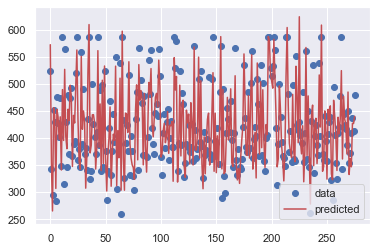

In [1648]:
obsno=np.arange(0,276,1)
fig,ax=plt.subplots()
ax.plot(obsno,y_test_series,'o',label='data')
ax.plot(obsno,pred_1,'r',label='predicted')
ax.legend(loc='best')